In [79]:
# Pour visualiser les données j'utilise la bibliothèque Pandas étudiée en DataScience -1
# Importation des librairies nécessaires
import pandas as pd

# 1) Ouverture du fichier 

In [80]:
# Importation des données
donnees_pneus = pd.read_csv('donnees_pneus.csv', sep = ';')

# 2) Analyse des données

In [81]:
donnees_pneus.head()

,Cat de Pneu,Type de Pneu,Age en semaine,Km mensuel,Pourcentage Utilisation (%),basse vitesse(%),Moderee (%),Haute Vitesse (%),Nombre Moyen de Freinage d'urgence /j,Score de conduite
0,Abimé,Hivers,24,2954,73,19,7,0,11,6
1,Usure Normale,Ete,25,1910,83,12,4,0,13,5
2,Usure Normale,Hivers,33,1997,88,9,2,1,15,5
3,Très abimé,Hivers,39,2852,93,4,3,1,12,5
4,Usure Normale,Ete,29,1988,72,22,6,0,9,5


In [82]:
donnees_pneus.describe()

,Age en semaine,Km mensuel,Pourcentage Utilisation (%),basse vitesse(%),Moderee (%),Haute Vitesse (%),Nombre Moyen de Freinage d'urgence /j,Score de conduite
count,81.000000,81.000000,81.000000,81.00000,81.000000,81.000000,81.000000,81.000000
mean,37.864198,2461.641975,74.913580,17.37037,6.333333,1.074074,13.802469,5.604938
std,13.428285,585.805264,10.305578,8.86911,3.485685,2.072304,5.228336,1.068632
min,21.000000,1241.000000,45.000000,1.00000,2.000000,0.000000,4.000000,3.000000
25%,24.000000,1999.000000,69.000000,11.00000,4.000000,0.000000,10.000000,5.000000
50%,35.000000,2359.000000,76.000000,16.00000,5.000000,0.000000,13.000000,6.000000
75%,49.000000,2852.000000,83.000000,22.00000,8.000000,1.000000,16.000000,6.000000
max,72.000000,4067.000000,93.000000,43.00000,18.000000,11.000000,30.000000,8.000000


In [83]:
donnees_pneus.dtypes

Cat de Pneu                              object
Type de Pneu                             object
Age en semaine                            int64
Km mensuel                                int64
Pourcentage Utilisation (%)               int64
basse vitesse(%)                          int64
Moderee (%)                               int64
Haute Vitesse (%)                         int64
Nombre Moyen de Freinage d'urgence /j     int64
Score de conduite                         int64
dtype: object

In [84]:
donnees_pneus.select_dtypes(exclude = 'int64')

,Cat de Pneu,Type de Pneu
0,Abimé,Hivers
1,Usure Normale,Ete
2,Usure Normale,Hivers
3,Très abimé,Hivers
4,Usure Normale,Ete
...,...,...
76,Usure Normale,Hivers
77,Usure Normale,Hivers
78,Usure Normale,Ete
79,Usure Normale,Hivers


In [85]:
diffs=pd.unique(donnees_pneus['Cat de Pneu'])

In [86]:
diffs

array(['Abimé', 'Usure Normale', 'Très abimé', 'Très faible usure', 'M'],
      dtype=object)

In [87]:
for diff in diffs:
    nb=donnees_pneus[donnees_pneus['Cat de Pneu'] == diff].shape[0]
    print("Nombre de "+str(diff)+"="+str(nb))
    

Nombre de Abimé=19
Nombre de Usure Normale=46
Nombre de Très abimé=12
Nombre de Très faible usure=3
Nombre de M=1


# 3) Prétraitement des données 

L'objectif du problème est de retrouver les pneus valides je vais considerer que M est à supprimer. Par la suite abimé et trés abimé peuvent etre considérés comme des pneus abimés. Le reste (usure normale et tres faible usure) sont des pneus en bon état. 

In [88]:
indexs=donnees_pneus[donnees_pneus['Cat de Pneu'] == 'M'].index

In [89]:
donnees_pneus.drop(indexs,inplace=True)

In [90]:
donnees_pneus=donnees_pneus.replace('Usure Normale', 1)
donnees_pneus=donnees_pneus.replace('Très faible usure', 1)
donnees_pneus=donnees_pneus.replace('Très abimé', 0)
donnees_pneus=donnees_pneus.replace('Abimé', 0)

In [91]:
donnees_pneus=donnees_pneus.drop(["Type de Pneu"], axis=1)

In [92]:
donnees_pneus.head()

,Cat de Pneu,Age en semaine,Km mensuel,Pourcentage Utilisation (%),basse vitesse(%),Moderee (%),Haute Vitesse (%),Nombre Moyen de Freinage d'urgence /j,Score de conduite
0,0,24,2954,73,19,7,0,11,6
1,1,25,1910,83,12,4,0,13,5
2,1,33,1997,88,9,2,1,15,5
3,0,39,2852,93,4,3,1,12,5
4,1,29,1988,72,22,6,0,9,5


Analysons la corrélation pour voir si certaines données explicatives sont en trop

<AxesSubplot:>

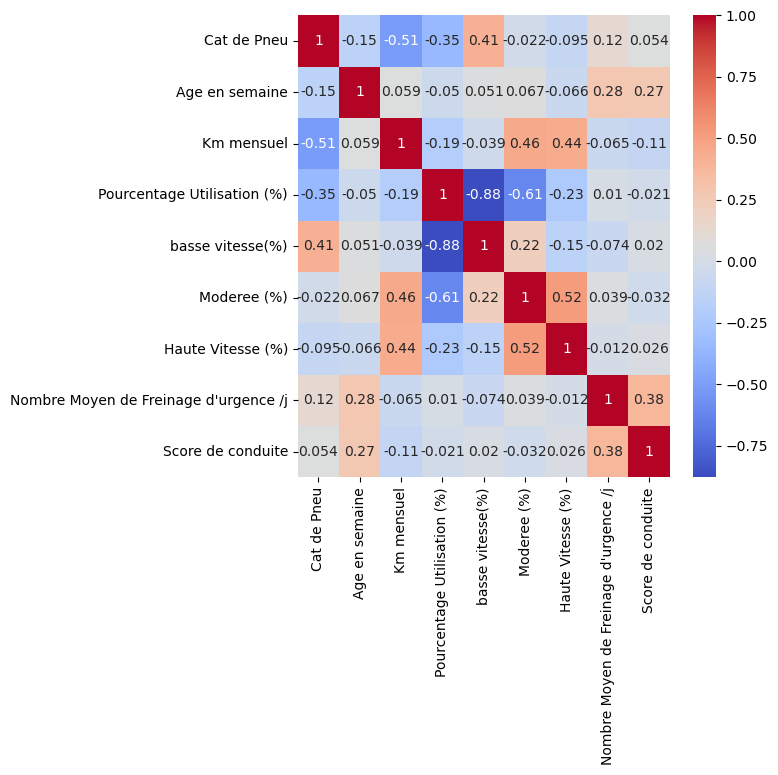

In [93]:
# Analyse de la corrélation
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6, 6))
sns.heatmap(donnees_pneus.corr(), annot=True, cmap='coolwarm', fmt='.2g')

Il semblerait qu'il n'y ai pas de corrélation entre les données donc on peut conserver toutes les données dans le dataframe pour construire notre modèle

Il y aurait donc 8 variables explicative pour construire un classificateur capable de dire si un pneu est en bon état ou non

# 4) Données d'entrée du modèle

In [94]:
x_raw=donnees_pneus.iloc[:, [1,2,3,4,5,6,7,8]].to_numpy()

In [95]:
y_raw=donnees_pneus.iloc[:, [0]].to_numpy()

# 5) Création du classificateur

In [96]:
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Le modèle créé comporte 2 couches :

La première couche est une couche d'entrée tf.keras.Input qui prend en entrée un tenseur de dimension (batch_size, 8) où batch_size est la taille du lot (batch) d'échantillons d'entraînement. Cette couche d'entrée est définie avec l'argument shape=(8,) pour spécifier la forme de l'entrée.

La deuxième couche est une couche dense tf.keras.layers.Dense avec 16 neurones et une fonction d'activation ReLU. Cette couche prend en entrée les données brutes de la couche d'entrée. La fonction d'activation ReLU permet d'ajouter de la non-linéarité au modèle.

La troisième et dernière couche est une couche dense tf.keras.layers.Dense avec 1 neurone et une fonction d'activation sigmoid. Cette couche calcule la sortie du modèle, qui est une probabilité entre 0 et 1.

Le modèle est compilé en utilisant l'optimiseur Adam avec un taux d'apprentissage de 0,01, la fonction de perte BinaryCrossentropy et la métrique d'évaluation accuracy.

Le modèle est entraîné avec les données d'entrée x_raw et les étiquettes y_raw pour 10000 époques avec une taille de lot (batch) de 32.

In [105]:
# Créer le modèle
inputs = tf.keras.Input(shape=(8,))
x = tf.keras.layers.Dense(16, activation=tf.nn.relu)(inputs)
outputs = tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

# Compiler le modèle
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

# Entraîner le modèle
model.fit(x_raw, y_raw, epochs=10000, batch_size=32)

Train on 80 samples
Epoch 1/10000


2023-05-03 19:02:38.951455: W tensorflow/c/c_api.cc:300] Operation '{name:'training_14/Adam/dense_30/kernel/v/Assign' id:2652 op device:{requested: '', assigned: ''} def:{{{node training_14/Adam/dense_30/kernel/v/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](training_14/Adam/dense_30/kernel/v, training_14/Adam/dense_30/kernel/v/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


80/80 [==============================] - 0s 2ms/sample - loss: 414.7943 - acc: 0.3875
Epoch 2/10000
80/80 [==============================] - 0s 160us/sample - loss: 244.8771 - acc: 0.3875
Epoch 3/10000
80/80 [==============================] - 0s 618us/sample - loss: 97.9153 - acc: 0.3875
Epoch 4/10000
80/80 [==============================] - 0s 356us/sample - loss: 23.4861 - acc: 0.5125
Epoch 5/10000
80/80 [==============================] - 0s 591us/sample - loss: 71.2664 - acc: 0.6125
Epoch 6/10000
80/80 [==============================] - 0s 260us/sample - loss: 75.7432 - acc: 0.6125
Epoch 7/10000
80/80 [==============================] - 0s 618us/sample - loss: 51.9563 - acc: 0.6125
Epoch 8/10000
80/80 [==============================] - 0s 379us/sample - loss: 13.1677 - acc: 0.6125
Epoch 9/10000
80/80 [==============================] - 0s 380us/sample - loss: 22.3154 - acc: 0.3875
Epoch 10/10000
80/80 [==============================] - 0s 360us/sample - loss: 22.4978 - acc: 0.3875
Epo

80/80 [==============================] - 0s 228us/sample - loss: 1.1810 - acc: 0.7125
Epoch 83/10000
80/80 [==============================] - 0s 130us/sample - loss: 0.5170 - acc: 0.7625
Epoch 84/10000
80/80 [==============================] - 0s 234us/sample - loss: 0.4221 - acc: 0.7875
Epoch 85/10000
80/80 [==============================] - 0s 141us/sample - loss: 0.5059 - acc: 0.7875
Epoch 86/10000
80/80 [==============================] - 0s 252us/sample - loss: 0.4724 - acc: 0.8000
Epoch 87/10000
80/80 [==============================] - 0s 188us/sample - loss: 0.4313 - acc: 0.8000
Epoch 88/10000
80/80 [==============================] - 0s 223us/sample - loss: 0.4071 - acc: 0.8375
Epoch 89/10000
80/80 [==============================] - 0s 206us/sample - loss: 0.3743 - acc: 0.8500
Epoch 90/10000
80/80 [==============================] - 0s 178us/sample - loss: 0.5309 - acc: 0.7625
Epoch 91/10000
80/80 [==============================] - 0s 154us/sample - loss: 0.6723 - acc: 0.7250
Epoch

80/80 [==============================] - 0s 143us/sample - loss: 0.4712 - acc: 0.8250
Epoch 163/10000
80/80 [==============================] - 0s 197us/sample - loss: 0.8067 - acc: 0.7375
Epoch 164/10000
80/80 [==============================] - 0s 346us/sample - loss: 0.8171 - acc: 0.7750
Epoch 165/10000
80/80 [==============================] - 0s 188us/sample - loss: 0.9501 - acc: 0.7000
Epoch 166/10000
80/80 [==============================] - 0s 148us/sample - loss: 1.0470 - acc: 0.7125
Epoch 167/10000
80/80 [==============================] - 0s 230us/sample - loss: 1.2766 - acc: 0.7000
Epoch 168/10000
80/80 [==============================] - 0s 212us/sample - loss: 0.8350 - acc: 0.7375
Epoch 169/10000
80/80 [==============================] - 0s 187us/sample - loss: 0.4885 - acc: 0.8250
Epoch 170/10000
80/80 [==============================] - 0s 222us/sample - loss: 0.7890 - acc: 0.7625
Epoch 171/10000
80/80 [==============================] - 0s 170us/sample - loss: 0.8268 - acc: 0.7

80/80 [==============================] - 0s 161us/sample - loss: 1.4168 - acc: 0.7625
Epoch 243/10000
80/80 [==============================] - 0s 286us/sample - loss: 1.0723 - acc: 0.7125
Epoch 244/10000
80/80 [==============================] - 0s 430us/sample - loss: 0.5658 - acc: 0.8125
Epoch 245/10000
80/80 [==============================] - 0s 375us/sample - loss: 0.5473 - acc: 0.8500
Epoch 246/10000
80/80 [==============================] - 0s 540us/sample - loss: 0.4533 - acc: 0.8250
Epoch 247/10000
80/80 [==============================] - 0s 226us/sample - loss: 0.4629 - acc: 0.8500
Epoch 248/10000
80/80 [==============================] - 0s 144us/sample - loss: 0.3808 - acc: 0.8375
Epoch 249/10000
80/80 [==============================] - 0s 180us/sample - loss: 0.5873 - acc: 0.8750
Epoch 250/10000
80/80 [==============================] - 0s 261us/sample - loss: 0.9524 - acc: 0.7125
Epoch 251/10000
80/80 [==============================] - 0s 217us/sample - loss: 1.0030 - acc: 0.7

80/80 [==============================] - 0s 231us/sample - loss: 0.6905 - acc: 0.7750
Epoch 323/10000
80/80 [==============================] - 0s 142us/sample - loss: 0.8954 - acc: 0.7625
Epoch 324/10000
80/80 [==============================] - 0s 296us/sample - loss: 1.6688 - acc: 0.6125
Epoch 325/10000
80/80 [==============================] - 0s 198us/sample - loss: 0.9670 - acc: 0.7625
Epoch 326/10000
80/80 [==============================] - 0s 233us/sample - loss: 0.8139 - acc: 0.7875
Epoch 327/10000
80/80 [==============================] - 0s 252us/sample - loss: 0.5081 - acc: 0.8250
Epoch 328/10000
80/80 [==============================] - 0s 189us/sample - loss: 0.3985 - acc: 0.8375
Epoch 329/10000
80/80 [==============================] - 0s 178us/sample - loss: 0.4561 - acc: 0.8625
Epoch 330/10000
80/80 [==============================] - 0s 187us/sample - loss: 0.6396 - acc: 0.7750
Epoch 331/10000
80/80 [==============================] - 0s 222us/sample - loss: 0.4556 - acc: 0.8

80/80 [==============================] - 0s 315us/sample - loss: 0.6885 - acc: 0.8000
Epoch 403/10000
80/80 [==============================] - 0s 296us/sample - loss: 0.4897 - acc: 0.8250
Epoch 404/10000
80/80 [==============================] - 0s 149us/sample - loss: 0.6377 - acc: 0.8375
Epoch 405/10000
80/80 [==============================] - 0s 176us/sample - loss: 0.5647 - acc: 0.7875
Epoch 406/10000
80/80 [==============================] - 0s 208us/sample - loss: 0.6381 - acc: 0.8125
Epoch 407/10000
80/80 [==============================] - 0s 195us/sample - loss: 0.8869 - acc: 0.7125
Epoch 408/10000
80/80 [==============================] - 0s 205us/sample - loss: 0.8880 - acc: 0.7875
Epoch 409/10000
80/80 [==============================] - 0s 482us/sample - loss: 0.5365 - acc: 0.8500
Epoch 410/10000
80/80 [==============================] - 0s 486us/sample - loss: 0.8546 - acc: 0.7875
Epoch 411/10000
80/80 [==============================] - 0s 206us/sample - loss: 0.9902 - acc: 0.7

80/80 [==============================] - 0s 217us/sample - loss: 0.5443 - acc: 0.8000
Epoch 483/10000
80/80 [==============================] - 0s 172us/sample - loss: 0.5082 - acc: 0.8750
Epoch 484/10000
80/80 [==============================] - 0s 306us/sample - loss: 0.6536 - acc: 0.8125
Epoch 485/10000
80/80 [==============================] - 0s 128us/sample - loss: 0.6163 - acc: 0.8250
Epoch 486/10000
80/80 [==============================] - 0s 178us/sample - loss: 0.8914 - acc: 0.7000
Epoch 487/10000
80/80 [==============================] - 0s 140us/sample - loss: 0.6445 - acc: 0.8375
Epoch 488/10000
80/80 [==============================] - 0s 170us/sample - loss: 0.4885 - acc: 0.8375
Epoch 489/10000
80/80 [==============================] - 0s 157us/sample - loss: 0.5592 - acc: 0.8375
Epoch 490/10000
80/80 [==============================] - 0s 185us/sample - loss: 1.0309 - acc: 0.6875
Epoch 491/10000
80/80 [==============================] - 0s 184us/sample - loss: 0.8720 - acc: 0.7

80/80 [==============================] - 0s 175us/sample - loss: 0.4190 - acc: 0.8500
Epoch 563/10000
80/80 [==============================] - 0s 113us/sample - loss: 0.4305 - acc: 0.8500
Epoch 564/10000
80/80 [==============================] - 0s 193us/sample - loss: 0.4084 - acc: 0.8625
Epoch 565/10000
80/80 [==============================] - 0s 149us/sample - loss: 0.6745 - acc: 0.8250
Epoch 566/10000
80/80 [==============================] - 0s 138us/sample - loss: 0.6672 - acc: 0.7875
Epoch 567/10000
80/80 [==============================] - 0s 273us/sample - loss: 0.5119 - acc: 0.8375
Epoch 568/10000
80/80 [==============================] - 0s 89us/sample - loss: 0.6732 - acc: 0.7750
Epoch 569/10000
80/80 [==============================] - 0s 142us/sample - loss: 0.4822 - acc: 0.8625
Epoch 570/10000
80/80 [==============================] - 0s 69us/sample - loss: 0.3941 - acc: 0.8375
Epoch 571/10000
80/80 [==============================] - 0s 230us/sample - loss: 0.4625 - acc: 0.837

80/80 [==============================] - 0s 222us/sample - loss: 0.5505 - acc: 0.8375
Epoch 643/10000
80/80 [==============================] - 0s 177us/sample - loss: 0.4436 - acc: 0.8375
Epoch 644/10000
80/80 [==============================] - 0s 180us/sample - loss: 0.3971 - acc: 0.8250
Epoch 645/10000
80/80 [==============================] - 0s 180us/sample - loss: 0.5818 - acc: 0.8125
Epoch 646/10000
80/80 [==============================] - 0s 219us/sample - loss: 0.5989 - acc: 0.7875
Epoch 647/10000
80/80 [==============================] - 0s 213us/sample - loss: 0.5385 - acc: 0.8125
Epoch 648/10000
80/80 [==============================] - 0s 179us/sample - loss: 0.6062 - acc: 0.8125
Epoch 649/10000
80/80 [==============================] - 0s 159us/sample - loss: 0.5654 - acc: 0.7875
Epoch 650/10000
80/80 [==============================] - 0s 214us/sample - loss: 0.4613 - acc: 0.8250
Epoch 651/10000
80/80 [==============================] - 0s 179us/sample - loss: 0.4188 - acc: 0.8

80/80 [==============================] - 0s 148us/sample - loss: 0.8180 - acc: 0.7625
Epoch 723/10000
80/80 [==============================] - 0s 310us/sample - loss: 0.6421 - acc: 0.8500
Epoch 724/10000
80/80 [==============================] - 0s 104us/sample - loss: 0.6181 - acc: 0.8125
Epoch 725/10000
80/80 [==============================] - 0s 458us/sample - loss: 0.5805 - acc: 0.8250
Epoch 726/10000
80/80 [==============================] - 0s 104us/sample - loss: 0.4205 - acc: 0.8375
Epoch 727/10000
80/80 [==============================] - 0s 120us/sample - loss: 0.4343 - acc: 0.8375
Epoch 728/10000
80/80 [==============================] - 0s 180us/sample - loss: 0.4687 - acc: 0.8500
Epoch 729/10000
80/80 [==============================] - 0s 181us/sample - loss: 0.4156 - acc: 0.8375
Epoch 730/10000
80/80 [==============================] - 0s 221us/sample - loss: 0.4145 - acc: 0.8250
Epoch 731/10000
80/80 [==============================] - 0s 245us/sample - loss: 0.4183 - acc: 0.8

80/80 [==============================] - 0s 188us/sample - loss: 0.3941 - acc: 0.8500
Epoch 803/10000
80/80 [==============================] - 0s 191us/sample - loss: 0.4541 - acc: 0.8375
Epoch 804/10000
80/80 [==============================] - 0s 119us/sample - loss: 0.5707 - acc: 0.7750
Epoch 805/10000
80/80 [==============================] - 0s 159us/sample - loss: 0.6527 - acc: 0.8000
Epoch 806/10000
80/80 [==============================] - 0s 116us/sample - loss: 0.5999 - acc: 0.7750
Epoch 807/10000
80/80 [==============================] - 0s 106us/sample - loss: 0.7507 - acc: 0.7875
Epoch 808/10000
80/80 [==============================] - 0s 134us/sample - loss: 0.5674 - acc: 0.7875
Epoch 809/10000
80/80 [==============================] - 0s 99us/sample - loss: 1.0537 - acc: 0.6750
Epoch 810/10000
80/80 [==============================] - 0s 164us/sample - loss: 0.4621 - acc: 0.8500
Epoch 811/10000
80/80 [==============================] - 0s 246us/sample - loss: 0.5125 - acc: 0.78

80/80 [==============================] - 0s 202us/sample - loss: 0.4287 - acc: 0.8125
Epoch 883/10000
80/80 [==============================] - 0s 183us/sample - loss: 0.4360 - acc: 0.8625
Epoch 884/10000
80/80 [==============================] - 0s 210us/sample - loss: 0.3660 - acc: 0.8500
Epoch 885/10000
80/80 [==============================] - 0s 196us/sample - loss: 0.4001 - acc: 0.8625
Epoch 886/10000
80/80 [==============================] - 0s 158us/sample - loss: 0.4350 - acc: 0.8375
Epoch 887/10000
80/80 [==============================] - 0s 159us/sample - loss: 0.3598 - acc: 0.8625
Epoch 888/10000
80/80 [==============================] - 0s 221us/sample - loss: 0.4461 - acc: 0.8250
Epoch 889/10000
80/80 [==============================] - 0s 221us/sample - loss: 0.6122 - acc: 0.7750
Epoch 890/10000
80/80 [==============================] - 0s 177us/sample - loss: 0.6842 - acc: 0.7875
Epoch 891/10000
80/80 [==============================] - 0s 190us/sample - loss: 0.6470 - acc: 0.7

80/80 [==============================] - 0s 306us/sample - loss: 1.1605 - acc: 0.6875
Epoch 963/10000
80/80 [==============================] - 0s 912us/sample - loss: 1.1700 - acc: 0.7000
Epoch 964/10000
80/80 [==============================] - 0s 240us/sample - loss: 0.5607 - acc: 0.8000
Epoch 965/10000
80/80 [==============================] - 0s 344us/sample - loss: 0.4716 - acc: 0.8500
Epoch 966/10000
80/80 [==============================] - 0s 281us/sample - loss: 0.5395 - acc: 0.8250
Epoch 967/10000
80/80 [==============================] - 0s 195us/sample - loss: 0.9204 - acc: 0.7750
Epoch 968/10000
80/80 [==============================] - 0s 271us/sample - loss: 0.4642 - acc: 0.8125
Epoch 969/10000
80/80 [==============================] - 0s 324us/sample - loss: 0.5388 - acc: 0.8750
Epoch 970/10000
80/80 [==============================] - 0s 197us/sample - loss: 0.4675 - acc: 0.7750
Epoch 971/10000
80/80 [==============================] - 0s 152us/sample - loss: 0.6088 - acc: 0.8

80/80 [==============================] - 0s 168us/sample - loss: 0.5429 - acc: 0.7625
Epoch 1043/10000
80/80 [==============================] - 0s 315us/sample - loss: 0.4246 - acc: 0.8750
Epoch 1044/10000
80/80 [==============================] - 0s 205us/sample - loss: 0.5396 - acc: 0.7875
Epoch 1045/10000
80/80 [==============================] - 0s 330us/sample - loss: 0.4097 - acc: 0.8500
Epoch 1046/10000
80/80 [==============================] - 0s 210us/sample - loss: 0.5160 - acc: 0.7750
Epoch 1047/10000
80/80 [==============================] - 0s 532us/sample - loss: 0.4423 - acc: 0.8125
Epoch 1048/10000
80/80 [==============================] - 0s 191us/sample - loss: 0.5262 - acc: 0.8125
Epoch 1049/10000
80/80 [==============================] - 0s 278us/sample - loss: 0.3992 - acc: 0.8125
Epoch 1050/10000
80/80 [==============================] - 0s 150us/sample - loss: 0.4659 - acc: 0.8625
Epoch 1051/10000
80/80 [==============================] - 0s 217us/sample - loss: 0.4461 -

80/80 [==============================] - 0s 215us/sample - loss: 0.4632 - acc: 0.8500
Epoch 1122/10000
80/80 [==============================] - 0s 174us/sample - loss: 0.4622 - acc: 0.8125
Epoch 1123/10000
80/80 [==============================] - 0s 216us/sample - loss: 0.5835 - acc: 0.7500
Epoch 1124/10000
80/80 [==============================] - 0s 316us/sample - loss: 0.4425 - acc: 0.8625
Epoch 1125/10000
80/80 [==============================] - 0s 258us/sample - loss: 0.4777 - acc: 0.8125
Epoch 1126/10000
80/80 [==============================] - 0s 244us/sample - loss: 0.4521 - acc: 0.8375
Epoch 1127/10000
80/80 [==============================] - 0s 294us/sample - loss: 0.5647 - acc: 0.7625
Epoch 1128/10000
80/80 [==============================] - 0s 205us/sample - loss: 0.6768 - acc: 0.7875
Epoch 1129/10000
80/80 [==============================] - 0s 198us/sample - loss: 0.6950 - acc: 0.6875
Epoch 1130/10000
80/80 [==============================] - 0s 291us/sample - loss: 1.0139 -

80/80 [==============================] - 0s 239us/sample - loss: 0.5555 - acc: 0.8125
Epoch 1201/10000
80/80 [==============================] - 0s 298us/sample - loss: 0.7262 - acc: 0.7750
Epoch 1202/10000
80/80 [==============================] - 0s 297us/sample - loss: 0.6156 - acc: 0.8250
Epoch 1203/10000
80/80 [==============================] - 0s 243us/sample - loss: 0.5272 - acc: 0.7750
Epoch 1204/10000
80/80 [==============================] - 0s 251us/sample - loss: 0.3082 - acc: 0.9000
Epoch 1205/10000
80/80 [==============================] - 0s 155us/sample - loss: 0.5715 - acc: 0.7875
Epoch 1206/10000
80/80 [==============================] - 0s 212us/sample - loss: 0.5394 - acc: 0.7625
Epoch 1207/10000
80/80 [==============================] - 0s 211us/sample - loss: 0.3813 - acc: 0.8625
Epoch 1208/10000
80/80 [==============================] - 0s 225us/sample - loss: 0.5166 - acc: 0.8000
Epoch 1209/10000
80/80 [==============================] - 0s 136us/sample - loss: 0.4231 -

80/80 [==============================] - 0s 113us/sample - loss: 0.4848 - acc: 0.8000
Epoch 1280/10000
80/80 [==============================] - 0s 137us/sample - loss: 0.7947 - acc: 0.7625
Epoch 1281/10000
80/80 [==============================] - 0s 203us/sample - loss: 0.4671 - acc: 0.7875
Epoch 1282/10000
80/80 [==============================] - 0s 231us/sample - loss: 0.4474 - acc: 0.8500
Epoch 1283/10000
80/80 [==============================] - 0s 111us/sample - loss: 0.4134 - acc: 0.8875
Epoch 1284/10000
80/80 [==============================] - 0s 262us/sample - loss: 0.4085 - acc: 0.8500
Epoch 1285/10000
80/80 [==============================] - 0s 175us/sample - loss: 0.4278 - acc: 0.8250
Epoch 1286/10000
80/80 [==============================] - 0s 183us/sample - loss: 0.3996 - acc: 0.8875
Epoch 1287/10000
80/80 [==============================] - 0s 201us/sample - loss: 0.3793 - acc: 0.8250
Epoch 1288/10000
80/80 [==============================] - 0s 168us/sample - loss: 0.3571 -

80/80 [==============================] - 0s 185us/sample - loss: 0.5924 - acc: 0.8000
Epoch 1359/10000
80/80 [==============================] - 0s 311us/sample - loss: 0.4275 - acc: 0.8375
Epoch 1360/10000
80/80 [==============================] - 0s 426us/sample - loss: 0.3846 - acc: 0.8625
Epoch 1361/10000
80/80 [==============================] - 0s 133us/sample - loss: 0.3941 - acc: 0.8500
Epoch 1362/10000
80/80 [==============================] - 0s 179us/sample - loss: 0.3463 - acc: 0.8375
Epoch 1363/10000
80/80 [==============================] - 0s 168us/sample - loss: 0.3705 - acc: 0.8625
Epoch 1364/10000
80/80 [==============================] - 0s 158us/sample - loss: 0.3430 - acc: 0.8375
Epoch 1365/10000
80/80 [==============================] - 0s 202us/sample - loss: 0.3923 - acc: 0.8125
Epoch 1366/10000
80/80 [==============================] - 0s 310us/sample - loss: 0.3744 - acc: 0.8250
Epoch 1367/10000
80/80 [==============================] - 0s 121us/sample - loss: 0.4336 -

80/80 [==============================] - 0s 116us/sample - loss: 0.6010 - acc: 0.8000
Epoch 1438/10000
80/80 [==============================] - 0s 146us/sample - loss: 0.4189 - acc: 0.7875
Epoch 1439/10000
80/80 [==============================] - 0s 167us/sample - loss: 0.4329 - acc: 0.8625
Epoch 1440/10000
80/80 [==============================] - 0s 165us/sample - loss: 0.3991 - acc: 0.8125
Epoch 1441/10000
80/80 [==============================] - 0s 166us/sample - loss: 0.3321 - acc: 0.8500
Epoch 1442/10000
80/80 [==============================] - 0s 175us/sample - loss: 0.4258 - acc: 0.8625
Epoch 1443/10000
80/80 [==============================] - 0s 195us/sample - loss: 0.4114 - acc: 0.8125
Epoch 1444/10000
80/80 [==============================] - 0s 161us/sample - loss: 0.5643 - acc: 0.8125
Epoch 1445/10000
80/80 [==============================] - 0s 195us/sample - loss: 0.3930 - acc: 0.8000
Epoch 1446/10000
80/80 [==============================] - 0s 127us/sample - loss: 0.6052 -

80/80 [==============================] - 0s 216us/sample - loss: 0.6269 - acc: 0.7625
Epoch 1517/10000
80/80 [==============================] - 0s 185us/sample - loss: 0.3840 - acc: 0.8375
Epoch 1518/10000
80/80 [==============================] - 0s 272us/sample - loss: 0.3962 - acc: 0.8375
Epoch 1519/10000
80/80 [==============================] - 0s 209us/sample - loss: 0.4626 - acc: 0.8125
Epoch 1520/10000
80/80 [==============================] - 0s 274us/sample - loss: 0.4454 - acc: 0.8500
Epoch 1521/10000
80/80 [==============================] - 0s 198us/sample - loss: 0.3627 - acc: 0.8500
Epoch 1522/10000
80/80 [==============================] - 0s 241us/sample - loss: 0.3824 - acc: 0.8500
Epoch 1523/10000
80/80 [==============================] - 0s 197us/sample - loss: 0.4432 - acc: 0.8250
Epoch 1524/10000
80/80 [==============================] - 0s 333us/sample - loss: 0.3730 - acc: 0.8625
Epoch 1525/10000
80/80 [==============================] - 0s 228us/sample - loss: 0.4151 -

80/80 [==============================] - 0s 257us/sample - loss: 0.4186 - acc: 0.8625
Epoch 1596/10000
80/80 [==============================] - 0s 420us/sample - loss: 0.4034 - acc: 0.8000
Epoch 1597/10000
80/80 [==============================] - 0s 231us/sample - loss: 0.3385 - acc: 0.8750
Epoch 1598/10000
80/80 [==============================] - 0s 172us/sample - loss: 0.3570 - acc: 0.8625
Epoch 1599/10000
80/80 [==============================] - 0s 248us/sample - loss: 0.3508 - acc: 0.8750
Epoch 1600/10000
80/80 [==============================] - 0s 403us/sample - loss: 0.3393 - acc: 0.8500
Epoch 1601/10000
80/80 [==============================] - 0s 122us/sample - loss: 0.3399 - acc: 0.8500
Epoch 1602/10000
80/80 [==============================] - 0s 486us/sample - loss: 0.3340 - acc: 0.8500
Epoch 1603/10000
80/80 [==============================] - 0s 416us/sample - loss: 0.3696 - acc: 0.8500
Epoch 1604/10000
80/80 [==============================] - 0s 263us/sample - loss: 0.5314 -

80/80 [==============================] - 0s 233us/sample - loss: 0.3551 - acc: 0.8625
Epoch 1675/10000
80/80 [==============================] - 0s 185us/sample - loss: 0.3396 - acc: 0.8500
Epoch 1676/10000
80/80 [==============================] - 0s 127us/sample - loss: 0.3495 - acc: 0.8500
Epoch 1677/10000
80/80 [==============================] - 0s 169us/sample - loss: 0.5615 - acc: 0.8125
Epoch 1678/10000
80/80 [==============================] - 0s 230us/sample - loss: 0.5135 - acc: 0.7625
Epoch 1679/10000
80/80 [==============================] - 0s 227us/sample - loss: 0.4928 - acc: 0.8000
Epoch 1680/10000
80/80 [==============================] - 0s 173us/sample - loss: 0.3729 - acc: 0.8250
Epoch 1681/10000
80/80 [==============================] - 0s 145us/sample - loss: 0.4884 - acc: 0.7875
Epoch 1682/10000
80/80 [==============================] - 0s 250us/sample - loss: 0.4691 - acc: 0.7875
Epoch 1683/10000
80/80 [==============================] - 0s 119us/sample - loss: 0.4443 -

80/80 [==============================] - 0s 239us/sample - loss: 0.4155 - acc: 0.8750
Epoch 1754/10000
80/80 [==============================] - 0s 211us/sample - loss: 0.3374 - acc: 0.8625
Epoch 1755/10000
80/80 [==============================] - 0s 340us/sample - loss: 0.4407 - acc: 0.8250
Epoch 1756/10000
80/80 [==============================] - 0s 227us/sample - loss: 0.4469 - acc: 0.8500
Epoch 1757/10000
80/80 [==============================] - 0s 224us/sample - loss: 0.4296 - acc: 0.8500
Epoch 1758/10000
80/80 [==============================] - 0s 224us/sample - loss: 0.3872 - acc: 0.8375
Epoch 1759/10000
80/80 [==============================] - 0s 225us/sample - loss: 0.4158 - acc: 0.8250
Epoch 1760/10000
80/80 [==============================] - 0s 344us/sample - loss: 0.4308 - acc: 0.8000
Epoch 1761/10000
80/80 [==============================] - 0s 155us/sample - loss: 0.3864 - acc: 0.8625
Epoch 1762/10000
80/80 [==============================] - 0s 406us/sample - loss: 0.4560 -

80/80 [==============================] - 0s 544us/sample - loss: 0.4439 - acc: 0.8375
Epoch 1833/10000
80/80 [==============================] - 0s 380us/sample - loss: 0.3388 - acc: 0.8625
Epoch 1834/10000
80/80 [==============================] - 0s 268us/sample - loss: 0.3379 - acc: 0.8500
Epoch 1835/10000
80/80 [==============================] - 0s 192us/sample - loss: 0.3688 - acc: 0.8500
Epoch 1836/10000
80/80 [==============================] - 0s 209us/sample - loss: 0.3699 - acc: 0.8500
Epoch 1837/10000
80/80 [==============================] - 0s 291us/sample - loss: 0.3806 - acc: 0.8125
Epoch 1838/10000
80/80 [==============================] - 0s 216us/sample - loss: 0.3420 - acc: 0.8625
Epoch 1839/10000
80/80 [==============================] - 0s 213us/sample - loss: 0.3511 - acc: 0.8375
Epoch 1840/10000
80/80 [==============================] - 0s 215us/sample - loss: 0.3847 - acc: 0.8375
Epoch 1841/10000
80/80 [==============================] - 0s 286us/sample - loss: 0.3878 -

80/80 [==============================] - 0s 110us/sample - loss: 0.3864 - acc: 0.8625
Epoch 1912/10000
80/80 [==============================] - 0s 169us/sample - loss: 0.7452 - acc: 0.7250
Epoch 1913/10000
80/80 [==============================] - 0s 200us/sample - loss: 0.5187 - acc: 0.8000
Epoch 1914/10000
80/80 [==============================] - 0s 131us/sample - loss: 0.4352 - acc: 0.8375
Epoch 1915/10000
80/80 [==============================] - 0s 361us/sample - loss: 0.3854 - acc: 0.8750
Epoch 1916/10000
80/80 [==============================] - 0s 207us/sample - loss: 0.5519 - acc: 0.7500
Epoch 1917/10000
80/80 [==============================] - 0s 141us/sample - loss: 0.5532 - acc: 0.8125
Epoch 1918/10000
80/80 [==============================] - 0s 142us/sample - loss: 0.4667 - acc: 0.8000
Epoch 1919/10000
80/80 [==============================] - 0s 148us/sample - loss: 0.4018 - acc: 0.8500
Epoch 1920/10000
80/80 [==============================] - 0s 376us/sample - loss: 0.3459 -

80/80 [==============================] - 0s 311us/sample - loss: 0.3325 - acc: 0.8500
Epoch 1991/10000
80/80 [==============================] - 0s 132us/sample - loss: 0.3682 - acc: 0.8375
Epoch 1992/10000
80/80 [==============================] - 0s 219us/sample - loss: 0.3895 - acc: 0.8125
Epoch 1993/10000
80/80 [==============================] - 0s 206us/sample - loss: 0.3441 - acc: 0.8625
Epoch 1994/10000
80/80 [==============================] - 0s 228us/sample - loss: 0.3266 - acc: 0.8500
Epoch 1995/10000
80/80 [==============================] - 0s 162us/sample - loss: 0.4061 - acc: 0.8000
Epoch 1996/10000
80/80 [==============================] - 0s 203us/sample - loss: 0.5435 - acc: 0.8000
Epoch 1997/10000
80/80 [==============================] - 0s 182us/sample - loss: 0.6880 - acc: 0.7250
Epoch 1998/10000
80/80 [==============================] - 0s 278us/sample - loss: 0.6135 - acc: 0.7750
Epoch 1999/10000
80/80 [==============================] - 0s 76us/sample - loss: 0.6644 - 

80/80 [==============================] - 0s 289us/sample - loss: 0.3048 - acc: 0.8750
Epoch 2070/10000
80/80 [==============================] - 0s 170us/sample - loss: 0.4657 - acc: 0.7625
Epoch 2071/10000
80/80 [==============================] - 0s 148us/sample - loss: 0.3915 - acc: 0.8500
Epoch 2072/10000
80/80 [==============================] - 0s 147us/sample - loss: 0.4779 - acc: 0.7750
Epoch 2073/10000
80/80 [==============================] - 0s 299us/sample - loss: 0.3206 - acc: 0.8750
Epoch 2074/10000
80/80 [==============================] - 0s 179us/sample - loss: 0.4048 - acc: 0.8375
Epoch 2075/10000
80/80 [==============================] - 0s 256us/sample - loss: 0.3330 - acc: 0.8375
Epoch 2076/10000
80/80 [==============================] - 0s 205us/sample - loss: 0.3350 - acc: 0.8500
Epoch 2077/10000
80/80 [==============================] - 0s 162us/sample - loss: 0.3413 - acc: 0.8375
Epoch 2078/10000
80/80 [==============================] - 0s 522us/sample - loss: 0.3574 -

80/80 [==============================] - 0s 420us/sample - loss: 0.3908 - acc: 0.8625
Epoch 2149/10000
80/80 [==============================] - 0s 262us/sample - loss: 0.3954 - acc: 0.8125
Epoch 2150/10000
80/80 [==============================] - 0s 324us/sample - loss: 0.4400 - acc: 0.8125
Epoch 2151/10000
80/80 [==============================] - 0s 362us/sample - loss: 0.5189 - acc: 0.7500
Epoch 2152/10000
80/80 [==============================] - 0s 160us/sample - loss: 0.5087 - acc: 0.7875
Epoch 2153/10000
80/80 [==============================] - 0s 349us/sample - loss: 0.4283 - acc: 0.8375
Epoch 2154/10000
80/80 [==============================] - 0s 179us/sample - loss: 0.4464 - acc: 0.7875
Epoch 2155/10000
80/80 [==============================] - 0s 200us/sample - loss: 0.4380 - acc: 0.8375
Epoch 2156/10000
80/80 [==============================] - 0s 197us/sample - loss: 0.4484 - acc: 0.8250
Epoch 2157/10000
80/80 [==============================] - 0s 254us/sample - loss: 0.3784 -

80/80 [==============================] - 0s 218us/sample - loss: 0.3934 - acc: 0.8500
Epoch 2228/10000
80/80 [==============================] - 0s 284us/sample - loss: 0.3401 - acc: 0.8250
Epoch 2229/10000
80/80 [==============================] - 0s 158us/sample - loss: 0.3464 - acc: 0.8500
Epoch 2230/10000
80/80 [==============================] - 0s 198us/sample - loss: 0.3382 - acc: 0.8625
Epoch 2231/10000
80/80 [==============================] - 0s 153us/sample - loss: 0.3488 - acc: 0.8625
Epoch 2232/10000
80/80 [==============================] - 0s 141us/sample - loss: 0.3504 - acc: 0.8500
Epoch 2233/10000
80/80 [==============================] - 0s 176us/sample - loss: 0.3545 - acc: 0.8750
Epoch 2234/10000
80/80 [==============================] - 0s 367us/sample - loss: 0.3359 - acc: 0.8750
Epoch 2235/10000
80/80 [==============================] - 0s 323us/sample - loss: 0.3757 - acc: 0.8250
Epoch 2236/10000
80/80 [==============================] - 0s 218us/sample - loss: 0.4216 -

80/80 [==============================] - 0s 133us/sample - loss: 0.3990 - acc: 0.8125
Epoch 2307/10000
80/80 [==============================] - 0s 213us/sample - loss: 0.4720 - acc: 0.8250
Epoch 2308/10000
80/80 [==============================] - 0s 218us/sample - loss: 0.4340 - acc: 0.8000
Epoch 2309/10000
80/80 [==============================] - 0s 190us/sample - loss: 0.4322 - acc: 0.8000
Epoch 2310/10000
80/80 [==============================] - 0s 390us/sample - loss: 0.3305 - acc: 0.8750
Epoch 2311/10000
80/80 [==============================] - 0s 528us/sample - loss: 0.4492 - acc: 0.7625
Epoch 2312/10000
80/80 [==============================] - 0s 214us/sample - loss: 0.3564 - acc: 0.8500
Epoch 2313/10000
80/80 [==============================] - 0s 287us/sample - loss: 0.3788 - acc: 0.8375
Epoch 2314/10000
80/80 [==============================] - 0s 362us/sample - loss: 0.3954 - acc: 0.8250
Epoch 2315/10000
80/80 [==============================] - 0s 181us/sample - loss: 0.3434 -

80/80 [==============================] - 0s 190us/sample - loss: 0.3424 - acc: 0.8500
Epoch 2386/10000
80/80 [==============================] - 0s 403us/sample - loss: 0.3386 - acc: 0.8625
Epoch 2387/10000
80/80 [==============================] - 0s 343us/sample - loss: 0.3553 - acc: 0.8500
Epoch 2388/10000
80/80 [==============================] - 0s 128us/sample - loss: 0.3398 - acc: 0.8250
Epoch 2389/10000
80/80 [==============================] - 0s 167us/sample - loss: 0.3364 - acc: 0.8500
Epoch 2390/10000
80/80 [==============================] - 0s 159us/sample - loss: 0.3380 - acc: 0.8500
Epoch 2391/10000
80/80 [==============================] - 0s 115us/sample - loss: 0.3316 - acc: 0.8375
Epoch 2392/10000
80/80 [==============================] - 0s 197us/sample - loss: 0.3545 - acc: 0.8500
Epoch 2393/10000
80/80 [==============================] - 0s 201us/sample - loss: 0.3375 - acc: 0.8625
Epoch 2394/10000
80/80 [==============================] - 0s 152us/sample - loss: 0.3638 -

80/80 [==============================] - 0s 389us/sample - loss: 0.3370 - acc: 0.8375
Epoch 2465/10000
80/80 [==============================] - 0s 246us/sample - loss: 0.3370 - acc: 0.8625
Epoch 2466/10000
80/80 [==============================] - 0s 294us/sample - loss: 0.3325 - acc: 0.8625
Epoch 2467/10000
80/80 [==============================] - 0s 206us/sample - loss: 0.3364 - acc: 0.8500
Epoch 2468/10000
80/80 [==============================] - 0s 298us/sample - loss: 0.3425 - acc: 0.8750
Epoch 2469/10000
80/80 [==============================] - 0s 102us/sample - loss: 0.3379 - acc: 0.8500
Epoch 2470/10000
80/80 [==============================] - 0s 419us/sample - loss: 0.3463 - acc: 0.8625
Epoch 2471/10000
80/80 [==============================] - 0s 122us/sample - loss: 0.4061 - acc: 0.8375
Epoch 2472/10000
80/80 [==============================] - 0s 127us/sample - loss: 0.3708 - acc: 0.8375
Epoch 2473/10000
80/80 [==============================] - 0s 155us/sample - loss: 0.3495 -

80/80 [==============================] - 0s 215us/sample - loss: 0.3905 - acc: 0.8250
Epoch 2544/10000
80/80 [==============================] - 0s 152us/sample - loss: 0.3787 - acc: 0.8625
Epoch 2545/10000
80/80 [==============================] - 0s 176us/sample - loss: 0.3965 - acc: 0.8250
Epoch 2546/10000
80/80 [==============================] - 0s 175us/sample - loss: 0.3697 - acc: 0.8375
Epoch 2547/10000
80/80 [==============================] - 0s 217us/sample - loss: 0.3697 - acc: 0.8375
Epoch 2548/10000
80/80 [==============================] - 0s 193us/sample - loss: 0.3841 - acc: 0.8500
Epoch 2549/10000
80/80 [==============================] - 0s 219us/sample - loss: 0.4187 - acc: 0.8375
Epoch 2550/10000
80/80 [==============================] - 0s 287us/sample - loss: 0.3876 - acc: 0.8000
Epoch 2551/10000
80/80 [==============================] - 0s 226us/sample - loss: 0.3731 - acc: 0.8500
Epoch 2552/10000
80/80 [==============================] - 0s 166us/sample - loss: 0.3750 -

80/80 [==============================] - 0s 197us/sample - loss: 0.4271 - acc: 0.8000
Epoch 2623/10000
80/80 [==============================] - 0s 229us/sample - loss: 0.3651 - acc: 0.8625
Epoch 2624/10000
80/80 [==============================] - 0s 270us/sample - loss: 0.3443 - acc: 0.8500
Epoch 2625/10000
80/80 [==============================] - 0s 184us/sample - loss: 0.3610 - acc: 0.8375
Epoch 2626/10000
80/80 [==============================] - 0s 239us/sample - loss: 0.3352 - acc: 0.8625
Epoch 2627/10000
80/80 [==============================] - 0s 292us/sample - loss: 0.3493 - acc: 0.8500
Epoch 2628/10000
80/80 [==============================] - 0s 249us/sample - loss: 0.3455 - acc: 0.8625
Epoch 2629/10000
80/80 [==============================] - 0s 404us/sample - loss: 0.3412 - acc: 0.8625
Epoch 2630/10000
80/80 [==============================] - 0s 209us/sample - loss: 0.3335 - acc: 0.8500
Epoch 2631/10000
80/80 [==============================] - 0s 207us/sample - loss: 0.3334 -

80/80 [==============================] - 0s 177us/sample - loss: 0.3320 - acc: 0.8500
Epoch 2702/10000
80/80 [==============================] - 0s 213us/sample - loss: 0.3361 - acc: 0.8375
Epoch 2703/10000
80/80 [==============================] - 0s 240us/sample - loss: 0.3324 - acc: 0.8625
Epoch 2704/10000
80/80 [==============================] - 0s 193us/sample - loss: 0.3359 - acc: 0.8375
Epoch 2705/10000
80/80 [==============================] - 0s 130us/sample - loss: 0.3318 - acc: 0.8375
Epoch 2706/10000
80/80 [==============================] - 0s 199us/sample - loss: 0.3319 - acc: 0.8500
Epoch 2707/10000
80/80 [==============================] - 0s 218us/sample - loss: 0.3349 - acc: 0.8500
Epoch 2708/10000
80/80 [==============================] - 0s 192us/sample - loss: 0.3311 - acc: 0.8500
Epoch 2709/10000
80/80 [==============================] - 0s 198us/sample - loss: 0.3454 - acc: 0.8500
Epoch 2710/10000
80/80 [==============================] - 0s 140us/sample - loss: 0.4126 -

80/80 [==============================] - 0s 248us/sample - loss: 0.3436 - acc: 0.8500
Epoch 2781/10000
80/80 [==============================] - 0s 206us/sample - loss: 0.3317 - acc: 0.8625
Epoch 2782/10000
80/80 [==============================] - 0s 127us/sample - loss: 0.3437 - acc: 0.8500
Epoch 2783/10000
80/80 [==============================] - 0s 221us/sample - loss: 0.3365 - acc: 0.8750
Epoch 2784/10000
80/80 [==============================] - 0s 334us/sample - loss: 0.3378 - acc: 0.8500
Epoch 2785/10000
80/80 [==============================] - 0s 359us/sample - loss: 0.3390 - acc: 0.8625
Epoch 2786/10000
80/80 [==============================] - 0s 181us/sample - loss: 0.3334 - acc: 0.8750
Epoch 2787/10000
80/80 [==============================] - 0s 782us/sample - loss: 0.3308 - acc: 0.8625
Epoch 2788/10000
80/80 [==============================] - 0s 520us/sample - loss: 0.3507 - acc: 0.8625
Epoch 2789/10000
80/80 [==============================] - 0s 231us/sample - loss: 0.3449 -

80/80 [==============================] - 0s 217us/sample - loss: 0.3778 - acc: 0.8250
Epoch 2860/10000
80/80 [==============================] - 0s 159us/sample - loss: 0.3417 - acc: 0.8625
Epoch 2861/10000
80/80 [==============================] - 0s 196us/sample - loss: 0.3473 - acc: 0.8750
Epoch 2862/10000
80/80 [==============================] - 0s 271us/sample - loss: 0.3551 - acc: 0.8250
Epoch 2863/10000
80/80 [==============================] - 0s 239us/sample - loss: 0.3571 - acc: 0.8625
Epoch 2864/10000
80/80 [==============================] - 0s 217us/sample - loss: 0.3475 - acc: 0.8625
Epoch 2865/10000
80/80 [==============================] - 0s 331us/sample - loss: 0.3400 - acc: 0.8750
Epoch 2866/10000
80/80 [==============================] - 0s 240us/sample - loss: 0.3394 - acc: 0.8500
Epoch 2867/10000
80/80 [==============================] - 0s 225us/sample - loss: 0.3458 - acc: 0.8750
Epoch 2868/10000
80/80 [==============================] - 0s 143us/sample - loss: 0.3626 -

80/80 [==============================] - 0s 208us/sample - loss: 0.3438 - acc: 0.8500
Epoch 2939/10000
80/80 [==============================] - 0s 158us/sample - loss: 0.3333 - acc: 0.8500
Epoch 2940/10000
80/80 [==============================] - 0s 239us/sample - loss: 0.3704 - acc: 0.8500
Epoch 2941/10000
80/80 [==============================] - 0s 122us/sample - loss: 0.3777 - acc: 0.8500
Epoch 2942/10000
80/80 [==============================] - 0s 144us/sample - loss: 0.3602 - acc: 0.8375
Epoch 2943/10000
80/80 [==============================] - 0s 172us/sample - loss: 0.3979 - acc: 0.8500
Epoch 2944/10000
80/80 [==============================] - 0s 145us/sample - loss: 0.3475 - acc: 0.8875
Epoch 2945/10000
80/80 [==============================] - 0s 140us/sample - loss: 0.4017 - acc: 0.8125
Epoch 2946/10000
80/80 [==============================] - 0s 177us/sample - loss: 0.3518 - acc: 0.8375
Epoch 2947/10000
80/80 [==============================] - 0s 219us/sample - loss: 0.3435 -

80/80 [==============================] - 0s 217us/sample - loss: 0.3408 - acc: 0.8625
Epoch 3018/10000
80/80 [==============================] - 0s 285us/sample - loss: 0.3426 - acc: 0.8500
Epoch 3019/10000
80/80 [==============================] - 0s 198us/sample - loss: 0.3456 - acc: 0.8625
Epoch 3020/10000
80/80 [==============================] - 0s 171us/sample - loss: 0.3342 - acc: 0.8625
Epoch 3021/10000
80/80 [==============================] - 0s 169us/sample - loss: 0.3410 - acc: 0.8500
Epoch 3022/10000
80/80 [==============================] - 0s 172us/sample - loss: 0.3398 - acc: 0.8500
Epoch 3023/10000
80/80 [==============================] - 0s 162us/sample - loss: 0.3374 - acc: 0.8500
Epoch 3024/10000
80/80 [==============================] - 0s 198us/sample - loss: 0.3354 - acc: 0.8375
Epoch 3025/10000
80/80 [==============================] - 0s 171us/sample - loss: 0.3447 - acc: 0.8625
Epoch 3026/10000
80/80 [==============================] - 0s 405us/sample - loss: 0.3533 -

80/80 [==============================] - 0s 245us/sample - loss: 0.3421 - acc: 0.8500
Epoch 3097/10000
80/80 [==============================] - 0s 368us/sample - loss: 0.3382 - acc: 0.8625
Epoch 3098/10000
80/80 [==============================] - 0s 173us/sample - loss: 0.3321 - acc: 0.8625
Epoch 3099/10000
80/80 [==============================] - 0s 177us/sample - loss: 0.3539 - acc: 0.8625
Epoch 3100/10000
80/80 [==============================] - 0s 334us/sample - loss: 0.3314 - acc: 0.8500
Epoch 3101/10000
80/80 [==============================] - 0s 177us/sample - loss: 0.3371 - acc: 0.8500
Epoch 3102/10000
80/80 [==============================] - 0s 143us/sample - loss: 0.3543 - acc: 0.8500
Epoch 3103/10000
80/80 [==============================] - 0s 149us/sample - loss: 0.3452 - acc: 0.8250
Epoch 3104/10000
80/80 [==============================] - 0s 120us/sample - loss: 0.3372 - acc: 0.8500
Epoch 3105/10000
80/80 [==============================] - 0s 155us/sample - loss: 0.3364 -

80/80 [==============================] - 0s 246us/sample - loss: 0.3437 - acc: 0.8750
Epoch 3176/10000
80/80 [==============================] - 0s 222us/sample - loss: 0.3421 - acc: 0.8500
Epoch 3177/10000
80/80 [==============================] - 0s 261us/sample - loss: 0.3529 - acc: 0.8750
Epoch 3178/10000
80/80 [==============================] - 0s 177us/sample - loss: 0.3330 - acc: 0.8750
Epoch 3179/10000
80/80 [==============================] - 0s 216us/sample - loss: 0.3411 - acc: 0.8500
Epoch 3180/10000
80/80 [==============================] - 0s 172us/sample - loss: 0.3527 - acc: 0.8750
Epoch 3181/10000
80/80 [==============================] - 0s 266us/sample - loss: 0.3232 - acc: 0.8750
Epoch 3182/10000
80/80 [==============================] - 0s 175us/sample - loss: 0.3647 - acc: 0.8375
Epoch 3183/10000
80/80 [==============================] - 0s 264us/sample - loss: 0.3303 - acc: 0.8500
Epoch 3184/10000
80/80 [==============================] - 0s 245us/sample - loss: 0.3446 -

80/80 [==============================] - 0s 222us/sample - loss: 0.4138 - acc: 0.8250
Epoch 3255/10000
80/80 [==============================] - 0s 257us/sample - loss: 0.3349 - acc: 0.8500
Epoch 3256/10000
80/80 [==============================] - 0s 211us/sample - loss: 0.4017 - acc: 0.8500
Epoch 3257/10000
80/80 [==============================] - 0s 238us/sample - loss: 0.3589 - acc: 0.8500
Epoch 3258/10000
80/80 [==============================] - 0s 190us/sample - loss: 0.3678 - acc: 0.8125
Epoch 3259/10000
80/80 [==============================] - 0s 283us/sample - loss: 0.3813 - acc: 0.8375
Epoch 3260/10000
80/80 [==============================] - 0s 252us/sample - loss: 0.3176 - acc: 0.8625
Epoch 3261/10000
80/80 [==============================] - 0s 209us/sample - loss: 0.4091 - acc: 0.8125
Epoch 3262/10000
80/80 [==============================] - 0s 329us/sample - loss: 0.3570 - acc: 0.8500
Epoch 3263/10000
80/80 [==============================] - 0s 844us/sample - loss: 0.3949 -

80/80 [==============================] - 0s 150us/sample - loss: 0.3374 - acc: 0.8625
Epoch 3334/10000
80/80 [==============================] - 0s 245us/sample - loss: 0.3510 - acc: 0.8375
Epoch 3335/10000
80/80 [==============================] - 0s 249us/sample - loss: 0.3325 - acc: 0.8375
Epoch 3336/10000
80/80 [==============================] - 0s 293us/sample - loss: 0.3402 - acc: 0.8625
Epoch 3337/10000
80/80 [==============================] - 0s 251us/sample - loss: 0.3425 - acc: 0.8500
Epoch 3338/10000
80/80 [==============================] - 0s 223us/sample - loss: 0.3369 - acc: 0.8750
Epoch 3339/10000
80/80 [==============================] - 0s 274us/sample - loss: 0.3319 - acc: 0.8500
Epoch 3340/10000
80/80 [==============================] - 0s 267us/sample - loss: 0.3413 - acc: 0.8750
Epoch 3341/10000
80/80 [==============================] - 0s 253us/sample - loss: 0.3333 - acc: 0.8500
Epoch 3342/10000
80/80 [==============================] - 0s 226us/sample - loss: 0.3415 -

80/80 [==============================] - 0s 164us/sample - loss: 0.3352 - acc: 0.8625
Epoch 3413/10000
80/80 [==============================] - 0s 169us/sample - loss: 0.3397 - acc: 0.8375
Epoch 3414/10000
80/80 [==============================] - 0s 244us/sample - loss: 0.3291 - acc: 0.8500
Epoch 3415/10000
80/80 [==============================] - 0s 256us/sample - loss: 0.3441 - acc: 0.8750
Epoch 3416/10000
80/80 [==============================] - 0s 383us/sample - loss: 0.3338 - acc: 0.8500
Epoch 3417/10000
80/80 [==============================] - 0s 272us/sample - loss: 0.3330 - acc: 0.8750
Epoch 3418/10000
80/80 [==============================] - 0s 229us/sample - loss: 0.3450 - acc: 0.8500
Epoch 3419/10000
80/80 [==============================] - 0s 182us/sample - loss: 0.3322 - acc: 0.8375
Epoch 3420/10000
80/80 [==============================] - 0s 218us/sample - loss: 0.3352 - acc: 0.8625
Epoch 3421/10000
80/80 [==============================] - 0s 205us/sample - loss: 0.3450 -

80/80 [==============================] - 0s 176us/sample - loss: 0.3702 - acc: 0.8500
Epoch 3492/10000
80/80 [==============================] - 0s 138us/sample - loss: 0.3416 - acc: 0.8625
Epoch 3493/10000
80/80 [==============================] - 0s 154us/sample - loss: 0.3362 - acc: 0.8750
Epoch 3494/10000
80/80 [==============================] - 0s 166us/sample - loss: 0.3328 - acc: 0.8375
Epoch 3495/10000
80/80 [==============================] - 0s 260us/sample - loss: 0.3415 - acc: 0.8625
Epoch 3496/10000
80/80 [==============================] - 0s 227us/sample - loss: 0.3382 - acc: 0.8500
Epoch 3497/10000
80/80 [==============================] - 0s 178us/sample - loss: 0.3338 - acc: 0.8750
Epoch 3498/10000
80/80 [==============================] - 0s 202us/sample - loss: 0.3409 - acc: 0.8375
Epoch 3499/10000
80/80 [==============================] - 0s 126us/sample - loss: 0.3384 - acc: 0.8625
Epoch 3500/10000
80/80 [==============================] - 0s 207us/sample - loss: 0.3333 -

80/80 [==============================] - 0s 160us/sample - loss: 0.3618 - acc: 0.8250
Epoch 3571/10000
80/80 [==============================] - 0s 201us/sample - loss: 0.3665 - acc: 0.8500
Epoch 3572/10000
80/80 [==============================] - 0s 155us/sample - loss: 0.3370 - acc: 0.8500
Epoch 3573/10000
80/80 [==============================] - 0s 281us/sample - loss: 0.3925 - acc: 0.8250
Epoch 3574/10000
80/80 [==============================] - 0s 184us/sample - loss: 0.3363 - acc: 0.8500
Epoch 3575/10000
80/80 [==============================] - 0s 144us/sample - loss: 0.3812 - acc: 0.8500
Epoch 3576/10000
80/80 [==============================] - 0s 166us/sample - loss: 0.3410 - acc: 0.8625
Epoch 3577/10000
80/80 [==============================] - 0s 175us/sample - loss: 0.3398 - acc: 0.8625
Epoch 3578/10000
80/80 [==============================] - 0s 149us/sample - loss: 0.3380 - acc: 0.8375
Epoch 3579/10000
80/80 [==============================] - 0s 173us/sample - loss: 0.3379 -

80/80 [==============================] - 0s 146us/sample - loss: 0.3503 - acc: 0.8500
Epoch 3650/10000
80/80 [==============================] - 0s 255us/sample - loss: 0.3386 - acc: 0.8500
Epoch 3651/10000
80/80 [==============================] - 0s 151us/sample - loss: 0.3333 - acc: 0.8625
Epoch 3652/10000
80/80 [==============================] - 0s 192us/sample - loss: 0.3514 - acc: 0.8375
Epoch 3653/10000
80/80 [==============================] - 0s 221us/sample - loss: 0.3467 - acc: 0.8750
Epoch 3654/10000
80/80 [==============================] - 0s 139us/sample - loss: 0.3380 - acc: 0.8625
Epoch 3655/10000
80/80 [==============================] - 0s 186us/sample - loss: 0.3632 - acc: 0.8500
Epoch 3656/10000
80/80 [==============================] - 0s 146us/sample - loss: 0.3358 - acc: 0.8500
Epoch 3657/10000
80/80 [==============================] - 0s 196us/sample - loss: 0.3641 - acc: 0.8625
Epoch 3658/10000
80/80 [==============================] - 0s 166us/sample - loss: 0.3460 -

80/80 [==============================] - 0s 163us/sample - loss: 0.3338 - acc: 0.8500
Epoch 3729/10000
80/80 [==============================] - 0s 161us/sample - loss: 0.3425 - acc: 0.8500
Epoch 3730/10000
80/80 [==============================] - 0s 172us/sample - loss: 0.3501 - acc: 0.8500
Epoch 3731/10000
80/80 [==============================] - 0s 114us/sample - loss: 0.3339 - acc: 0.8500
Epoch 3732/10000
80/80 [==============================] - 0s 163us/sample - loss: 0.3489 - acc: 0.8625
Epoch 3733/10000
80/80 [==============================] - 0s 133us/sample - loss: 0.3257 - acc: 0.8500
Epoch 3734/10000
80/80 [==============================] - 0s 196us/sample - loss: 0.3706 - acc: 0.8500
Epoch 3735/10000
80/80 [==============================] - 0s 193us/sample - loss: 0.3499 - acc: 0.8750
Epoch 3736/10000
80/80 [==============================] - 0s 170us/sample - loss: 0.3471 - acc: 0.8500
Epoch 3737/10000
80/80 [==============================] - 0s 238us/sample - loss: 0.3530 -

80/80 [==============================] - 0s 235us/sample - loss: 0.3401 - acc: 0.8750
Epoch 3808/10000
80/80 [==============================] - 0s 210us/sample - loss: 0.3425 - acc: 0.8500
Epoch 3809/10000
80/80 [==============================] - 0s 155us/sample - loss: 0.3518 - acc: 0.8500
Epoch 3810/10000
80/80 [==============================] - 0s 228us/sample - loss: 0.3402 - acc: 0.8625
Epoch 3811/10000
80/80 [==============================] - 0s 240us/sample - loss: 0.3573 - acc: 0.8500
Epoch 3812/10000
80/80 [==============================] - 0s 252us/sample - loss: 0.3546 - acc: 0.8500
Epoch 3813/10000
80/80 [==============================] - 0s 177us/sample - loss: 0.3485 - acc: 0.8750
Epoch 3814/10000
80/80 [==============================] - 0s 276us/sample - loss: 0.3365 - acc: 0.8375
Epoch 3815/10000
80/80 [==============================] - 0s 194us/sample - loss: 0.3458 - acc: 0.8750
Epoch 3816/10000
80/80 [==============================] - 0s 267us/sample - loss: 0.3401 -

80/80 [==============================] - 0s 139us/sample - loss: 0.3346 - acc: 0.8500
Epoch 3887/10000
80/80 [==============================] - 0s 125us/sample - loss: 0.3444 - acc: 0.8500
Epoch 3888/10000
80/80 [==============================] - 0s 110us/sample - loss: 0.3424 - acc: 0.8750
Epoch 3889/10000
80/80 [==============================] - 0s 114us/sample - loss: 0.3364 - acc: 0.8750
Epoch 3890/10000
80/80 [==============================] - 0s 130us/sample - loss: 0.3387 - acc: 0.8625
Epoch 3891/10000
80/80 [==============================] - 0s 140us/sample - loss: 0.3457 - acc: 0.8750
Epoch 3892/10000
80/80 [==============================] - 0s 150us/sample - loss: 0.3652 - acc: 0.8375
Epoch 3893/10000
80/80 [==============================] - 0s 178us/sample - loss: 0.3508 - acc: 0.8625
Epoch 3894/10000
80/80 [==============================] - 0s 131us/sample - loss: 0.3567 - acc: 0.8500
Epoch 3895/10000
80/80 [==============================] - 0s 181us/sample - loss: 0.3924 -

80/80 [==============================] - 0s 131us/sample - loss: 0.3916 - acc: 0.8125
Epoch 3966/10000
80/80 [==============================] - 0s 160us/sample - loss: 0.3606 - acc: 0.8500
Epoch 3967/10000
80/80 [==============================] - 0s 161us/sample - loss: 0.3501 - acc: 0.8500
Epoch 3968/10000
80/80 [==============================] - 0s 230us/sample - loss: 0.3484 - acc: 0.8750
Epoch 3969/10000
80/80 [==============================] - 0s 178us/sample - loss: 0.3549 - acc: 0.8625
Epoch 3970/10000
80/80 [==============================] - 0s 161us/sample - loss: 0.3785 - acc: 0.8250
Epoch 3971/10000
80/80 [==============================] - 0s 139us/sample - loss: 0.3577 - acc: 0.8375
Epoch 3972/10000
80/80 [==============================] - 0s 125us/sample - loss: 0.3368 - acc: 0.8500
Epoch 3973/10000
80/80 [==============================] - 0s 90us/sample - loss: 0.3481 - acc: 0.8625
Epoch 3974/10000
80/80 [==============================] - 0s 102us/sample - loss: 0.3533 - 

80/80 [==============================] - 0s 207us/sample - loss: 0.3370 - acc: 0.8500
Epoch 4045/10000
80/80 [==============================] - 0s 202us/sample - loss: 0.3349 - acc: 0.8500
Epoch 4046/10000
80/80 [==============================] - 0s 203us/sample - loss: 0.3362 - acc: 0.8375
Epoch 4047/10000
80/80 [==============================] - 0s 152us/sample - loss: 0.3340 - acc: 0.8500
Epoch 4048/10000
80/80 [==============================] - 0s 208us/sample - loss: 0.3466 - acc: 0.8625
Epoch 4049/10000
80/80 [==============================] - 0s 188us/sample - loss: 0.3224 - acc: 0.8750
Epoch 4050/10000
80/80 [==============================] - 0s 184us/sample - loss: 0.3654 - acc: 0.8500
Epoch 4051/10000
80/80 [==============================] - 0s 179us/sample - loss: 0.3281 - acc: 0.8625
Epoch 4052/10000
80/80 [==============================] - 0s 192us/sample - loss: 0.3675 - acc: 0.8625
Epoch 4053/10000
80/80 [==============================] - 0s 199us/sample - loss: 0.3276 -

80/80 [==============================] - 0s 276us/sample - loss: 0.3240 - acc: 0.8500
Epoch 4124/10000
80/80 [==============================] - 0s 248us/sample - loss: 0.3946 - acc: 0.8500
Epoch 4125/10000
80/80 [==============================] - 0s 231us/sample - loss: 0.3348 - acc: 0.8250
Epoch 4126/10000
80/80 [==============================] - 0s 167us/sample - loss: 0.3808 - acc: 0.8625
Epoch 4127/10000
80/80 [==============================] - 0s 141us/sample - loss: 0.3888 - acc: 0.8625
Epoch 4128/10000
80/80 [==============================] - 0s 309us/sample - loss: 0.3497 - acc: 0.8500
Epoch 4129/10000
80/80 [==============================] - 0s 155us/sample - loss: 0.3809 - acc: 0.8250
Epoch 4130/10000
80/80 [==============================] - 0s 150us/sample - loss: 0.3292 - acc: 0.8625
Epoch 4131/10000
80/80 [==============================] - 0s 148us/sample - loss: 0.3634 - acc: 0.8500
Epoch 4132/10000
80/80 [==============================] - 0s 204us/sample - loss: 0.3271 -

80/80 [==============================] - 0s 195us/sample - loss: 0.3399 - acc: 0.8625
Epoch 4203/10000
80/80 [==============================] - 0s 242us/sample - loss: 0.3373 - acc: 0.8625
Epoch 4204/10000
80/80 [==============================] - 0s 291us/sample - loss: 0.3344 - acc: 0.8500
Epoch 4205/10000
80/80 [==============================] - 0s 125us/sample - loss: 0.3339 - acc: 0.8500
Epoch 4206/10000
80/80 [==============================] - 0s 231us/sample - loss: 0.3370 - acc: 0.8625
Epoch 4207/10000
80/80 [==============================] - 0s 178us/sample - loss: 0.3342 - acc: 0.8500
Epoch 4208/10000
80/80 [==============================] - 0s 629us/sample - loss: 0.3356 - acc: 0.8625
Epoch 4209/10000
80/80 [==============================] - 0s 466us/sample - loss: 0.3312 - acc: 0.8500
Epoch 4210/10000
80/80 [==============================] - 0s 206us/sample - loss: 0.3402 - acc: 0.8500
Epoch 4211/10000
80/80 [==============================] - 0s 111us/sample - loss: 0.3446 -

80/80 [==============================] - 0s 192us/sample - loss: 0.3411 - acc: 0.8500
Epoch 4282/10000
80/80 [==============================] - 0s 346us/sample - loss: 0.3387 - acc: 0.8625
Epoch 4283/10000
80/80 [==============================] - 0s 288us/sample - loss: 0.3628 - acc: 0.8500
Epoch 4284/10000
80/80 [==============================] - 0s 134us/sample - loss: 0.3422 - acc: 0.8250
Epoch 4285/10000
80/80 [==============================] - 0s 184us/sample - loss: 0.3576 - acc: 0.8500
Epoch 4286/10000
80/80 [==============================] - 0s 282us/sample - loss: 0.3803 - acc: 0.8125
Epoch 4287/10000
80/80 [==============================] - 0s 505us/sample - loss: 0.3480 - acc: 0.8500
Epoch 4288/10000
80/80 [==============================] - 0s 208us/sample - loss: 0.3899 - acc: 0.8250
Epoch 4289/10000
80/80 [==============================] - 0s 194us/sample - loss: 0.3419 - acc: 0.8375
Epoch 4290/10000
80/80 [==============================] - 0s 232us/sample - loss: 0.3492 -

80/80 [==============================] - 0s 96us/sample - loss: 0.3993 - acc: 0.8375
Epoch 4361/10000
80/80 [==============================] - 0s 73us/sample - loss: 0.4012 - acc: 0.8500
Epoch 4362/10000
80/80 [==============================] - 0s 119us/sample - loss: 0.3460 - acc: 0.8500
Epoch 4363/10000
80/80 [==============================] - 0s 203us/sample - loss: 0.3738 - acc: 0.8375
Epoch 4364/10000
80/80 [==============================] - 0s 112us/sample - loss: 0.3484 - acc: 0.8625
Epoch 4365/10000
80/80 [==============================] - 0s 84us/sample - loss: 0.3498 - acc: 0.8625
Epoch 4366/10000
80/80 [==============================] - 0s 94us/sample - loss: 0.3638 - acc: 0.8625
Epoch 4367/10000
80/80 [==============================] - 0s 104us/sample - loss: 0.3522 - acc: 0.8375
Epoch 4368/10000
80/80 [==============================] - 0s 90us/sample - loss: 0.3438 - acc: 0.8625
Epoch 4369/10000
80/80 [==============================] - 0s 97us/sample - loss: 0.3539 - acc: 

Epoch 4440/10000
80/80 [==============================] - 0s 121us/sample - loss: 0.3516 - acc: 0.8875
Epoch 4441/10000
80/80 [==============================] - 0s 123us/sample - loss: 0.3487 - acc: 0.8750
Epoch 4442/10000
80/80 [==============================] - 0s 325us/sample - loss: 0.3505 - acc: 0.8500
Epoch 4443/10000
80/80 [==============================] - 0s 85us/sample - loss: 0.3381 - acc: 0.8500
Epoch 4444/10000
80/80 [==============================] - 0s 88us/sample - loss: 0.3326 - acc: 0.8500
Epoch 4445/10000
80/80 [==============================] - 0s 114us/sample - loss: 0.3649 - acc: 0.8375
Epoch 4446/10000
80/80 [==============================] - 0s 84us/sample - loss: 0.3347 - acc: 0.8500
Epoch 4447/10000
80/80 [==============================] - 0s 101us/sample - loss: 0.3464 - acc: 0.8625
Epoch 4448/10000
80/80 [==============================] - 0s 94us/sample - loss: 0.3332 - acc: 0.8500
Epoch 4449/10000
80/80 [==============================] - 0s 82us/sample - lo

80/80 [==============================] - 0s 99us/sample - loss: 0.3839 - acc: 0.8375
Epoch 4520/10000
80/80 [==============================] - 0s 267us/sample - loss: 0.3267 - acc: 0.8750
Epoch 4521/10000
80/80 [==============================] - 0s 112us/sample - loss: 0.3761 - acc: 0.8125
Epoch 4522/10000
80/80 [==============================] - 0s 93us/sample - loss: 0.3517 - acc: 0.8375
Epoch 4523/10000
80/80 [==============================] - 0s 160us/sample - loss: 0.3533 - acc: 0.8500
Epoch 4524/10000
80/80 [==============================] - 0s 99us/sample - loss: 0.3481 - acc: 0.8375
Epoch 4525/10000
80/80 [==============================] - 0s 90us/sample - loss: 0.3371 - acc: 0.8500
Epoch 4526/10000
80/80 [==============================] - 0s 123us/sample - loss: 0.3510 - acc: 0.8625
Epoch 4527/10000
80/80 [==============================] - 0s 88us/sample - loss: 0.3544 - acc: 0.8375
Epoch 4528/10000
80/80 [==============================] - 0s 139us/sample - loss: 0.3778 - acc:

80/80 [==============================] - 0s 134us/sample - loss: 0.3398 - acc: 0.8500
Epoch 4600/10000
80/80 [==============================] - 0s 100us/sample - loss: 0.3433 - acc: 0.8625
Epoch 4601/10000
80/80 [==============================] - 0s 89us/sample - loss: 0.3366 - acc: 0.8625
Epoch 4602/10000
80/80 [==============================] - 0s 85us/sample - loss: 0.3460 - acc: 0.8500
Epoch 4603/10000
80/80 [==============================] - 0s 83us/sample - loss: 0.3501 - acc: 0.8500
Epoch 4604/10000
80/80 [==============================] - 0s 117us/sample - loss: 0.3436 - acc: 0.8500
Epoch 4605/10000
80/80 [==============================] - 0s 118us/sample - loss: 0.3455 - acc: 0.8625
Epoch 4606/10000
80/80 [==============================] - 0s 112us/sample - loss: 0.3452 - acc: 0.8750
Epoch 4607/10000
80/80 [==============================] - 0s 104us/sample - loss: 0.3666 - acc: 0.8500
Epoch 4608/10000
80/80 [==============================] - 0s 99us/sample - loss: 0.3528 - acc

80/80 [==============================] - 0s 113us/sample - loss: 0.3452 - acc: 0.8750
Epoch 4680/10000
80/80 [==============================] - 0s 82us/sample - loss: 0.3470 - acc: 0.8500
Epoch 4681/10000
80/80 [==============================] - 0s 116us/sample - loss: 0.3251 - acc: 0.8750
Epoch 4682/10000
80/80 [==============================] - 0s 105us/sample - loss: 0.3879 - acc: 0.8125
Epoch 4683/10000
80/80 [==============================] - 0s 77us/sample - loss: 0.3291 - acc: 0.8750
Epoch 4684/10000
80/80 [==============================] - 0s 109us/sample - loss: 0.3606 - acc: 0.8500
Epoch 4685/10000
80/80 [==============================] - 0s 251us/sample - loss: 0.3392 - acc: 0.8500
Epoch 4686/10000
80/80 [==============================] - 0s 136us/sample - loss: 0.3422 - acc: 0.8500
Epoch 4687/10000
80/80 [==============================] - 0s 125us/sample - loss: 0.3398 - acc: 0.8500
Epoch 4688/10000
80/80 [==============================] - 0s 122us/sample - loss: 0.3540 - a

Epoch 4759/10000
80/80 [==============================] - 0s 222us/sample - loss: 0.3487 - acc: 0.8750
Epoch 4760/10000
80/80 [==============================] - 0s 145us/sample - loss: 0.3452 - acc: 0.8500
Epoch 4761/10000
80/80 [==============================] - 0s 93us/sample - loss: 0.3480 - acc: 0.8625
Epoch 4762/10000
80/80 [==============================] - 0s 122us/sample - loss: 0.3324 - acc: 0.8375
Epoch 4763/10000
80/80 [==============================] - 0s 156us/sample - loss: 0.4266 - acc: 0.8500
Epoch 4764/10000
80/80 [==============================] - 0s 144us/sample - loss: 0.3790 - acc: 0.8375
Epoch 4765/10000
80/80 [==============================] - 0s 160us/sample - loss: 0.4024 - acc: 0.8125
Epoch 4766/10000
80/80 [==============================] - 0s 85us/sample - loss: 0.3576 - acc: 0.8500
Epoch 4767/10000
80/80 [==============================] - 0s 80us/sample - loss: 0.3730 - acc: 0.8500
Epoch 4768/10000
80/80 [==============================] - 0s 88us/sample - l

Epoch 4839/10000
80/80 [==============================] - 0s 113us/sample - loss: 0.3606 - acc: 0.8500
Epoch 4840/10000
80/80 [==============================] - 0s 89us/sample - loss: 0.3733 - acc: 0.8375
Epoch 4841/10000
80/80 [==============================] - 0s 97us/sample - loss: 0.3727 - acc: 0.8625
Epoch 4842/10000
80/80 [==============================] - 0s 121us/sample - loss: 0.3871 - acc: 0.8375
Epoch 4843/10000
80/80 [==============================] - 0s 177us/sample - loss: 0.3520 - acc: 0.8500
Epoch 4844/10000
80/80 [==============================] - 0s 106us/sample - loss: 0.3398 - acc: 0.8625
Epoch 4845/10000
80/80 [==============================] - 0s 100us/sample - loss: 0.3509 - acc: 0.8500
Epoch 4846/10000
80/80 [==============================] - 0s 265us/sample - loss: 0.3612 - acc: 0.8375
Epoch 4847/10000
80/80 [==============================] - 0s 91us/sample - loss: 0.3394 - acc: 0.8625
Epoch 4848/10000
80/80 [==============================] - 0s 89us/sample - l

80/80 [==============================] - 0s 103us/sample - loss: 0.3456 - acc: 0.8500
Epoch 4919/10000
80/80 [==============================] - 0s 140us/sample - loss: 0.3532 - acc: 0.8625
Epoch 4920/10000
80/80 [==============================] - 0s 99us/sample - loss: 0.3565 - acc: 0.8375
Epoch 4921/10000
80/80 [==============================] - 0s 97us/sample - loss: 0.3426 - acc: 0.8500
Epoch 4922/10000
80/80 [==============================] - 0s 142us/sample - loss: 0.3706 - acc: 0.8500
Epoch 4923/10000
80/80 [==============================] - 0s 107us/sample - loss: 0.3628 - acc: 0.8500
Epoch 4924/10000
80/80 [==============================] - 0s 107us/sample - loss: 0.3761 - acc: 0.8375
Epoch 4925/10000
80/80 [==============================] - 0s 125us/sample - loss: 0.3748 - acc: 0.8125
Epoch 4926/10000
80/80 [==============================] - 0s 103us/sample - loss: 0.3890 - acc: 0.8625
Epoch 4927/10000
80/80 [==============================] - 0s 94us/sample - loss: 0.3644 - ac

80/80 [==============================] - 0s 180us/sample - loss: 0.3352 - acc: 0.8375
Epoch 4998/10000
80/80 [==============================] - 0s 170us/sample - loss: 0.3400 - acc: 0.8500
Epoch 4999/10000
80/80 [==============================] - 0s 149us/sample - loss: 0.3371 - acc: 0.8625
Epoch 5000/10000
80/80 [==============================] - 0s 119us/sample - loss: 0.3401 - acc: 0.8500
Epoch 5001/10000
80/80 [==============================] - 0s 162us/sample - loss: 0.3585 - acc: 0.8375
Epoch 5002/10000
80/80 [==============================] - 0s 144us/sample - loss: 0.3589 - acc: 0.8500
Epoch 5003/10000
80/80 [==============================] - 0s 331us/sample - loss: 0.3852 - acc: 0.8375
Epoch 5004/10000
80/80 [==============================] - 0s 457us/sample - loss: 0.3315 - acc: 0.8625
Epoch 5005/10000
80/80 [==============================] - 0s 125us/sample - loss: 0.3469 - acc: 0.8500
Epoch 5006/10000
80/80 [==============================] - 0s 184us/sample - loss: 0.3272 -

80/80 [==============================] - 0s 129us/sample - loss: 0.3501 - acc: 0.8625
Epoch 5077/10000
80/80 [==============================] - 0s 126us/sample - loss: 0.3491 - acc: 0.8250
Epoch 5078/10000
80/80 [==============================] - 0s 137us/sample - loss: 0.3464 - acc: 0.8500
Epoch 5079/10000
80/80 [==============================] - 0s 99us/sample - loss: 0.3432 - acc: 0.8625
Epoch 5080/10000
80/80 [==============================] - 0s 159us/sample - loss: 0.3402 - acc: 0.8625
Epoch 5081/10000
80/80 [==============================] - 0s 125us/sample - loss: 0.3658 - acc: 0.8625
Epoch 5082/10000
80/80 [==============================] - 0s 124us/sample - loss: 0.3424 - acc: 0.8500
Epoch 5083/10000
80/80 [==============================] - 0s 196us/sample - loss: 0.3703 - acc: 0.8500
Epoch 5084/10000
80/80 [==============================] - 0s 156us/sample - loss: 0.3381 - acc: 0.9000
Epoch 5085/10000
80/80 [==============================] - 0s 158us/sample - loss: 0.3611 - 

80/80 [==============================] - 0s 276us/sample - loss: 0.4268 - acc: 0.8000
Epoch 5156/10000
80/80 [==============================] - 0s 208us/sample - loss: 0.3417 - acc: 0.8500
Epoch 5157/10000
80/80 [==============================] - 0s 106us/sample - loss: 0.4158 - acc: 0.8250
Epoch 5158/10000
80/80 [==============================] - 0s 116us/sample - loss: 0.3577 - acc: 0.8500
Epoch 5159/10000
80/80 [==============================] - 0s 245us/sample - loss: 0.4151 - acc: 0.8125
Epoch 5160/10000
80/80 [==============================] - 0s 154us/sample - loss: 0.3328 - acc: 0.8625
Epoch 5161/10000
80/80 [==============================] - 0s 193us/sample - loss: 0.3465 - acc: 0.8625
Epoch 5162/10000
80/80 [==============================] - 0s 167us/sample - loss: 0.3922 - acc: 0.8250
Epoch 5163/10000
80/80 [==============================] - 0s 125us/sample - loss: 0.3351 - acc: 0.8750
Epoch 5164/10000
80/80 [==============================] - 0s 227us/sample - loss: 0.3528 -

Epoch 5235/10000
80/80 [==============================] - 0s 142us/sample - loss: 0.3662 - acc: 0.8375
Epoch 5236/10000
80/80 [==============================] - 0s 755us/sample - loss: 0.3622 - acc: 0.8500
Epoch 5237/10000
80/80 [==============================] - 0s 92us/sample - loss: 0.3483 - acc: 0.8500
Epoch 5238/10000
80/80 [==============================] - 0s 91us/sample - loss: 0.3703 - acc: 0.8500
Epoch 5239/10000
80/80 [==============================] - 0s 115us/sample - loss: 0.3651 - acc: 0.8500
Epoch 5240/10000
80/80 [==============================] - 0s 106us/sample - loss: 0.3629 - acc: 0.8625
Epoch 5241/10000
80/80 [==============================] - 0s 84us/sample - loss: 0.3321 - acc: 0.8625
Epoch 5242/10000
80/80 [==============================] - 0s 119us/sample - loss: 0.3757 - acc: 0.8500
Epoch 5243/10000
80/80 [==============================] - 0s 158us/sample - loss: 0.3179 - acc: 0.8625
Epoch 5244/10000
80/80 [==============================] - 0s 87us/sample - l

Epoch 5315/10000
80/80 [==============================] - 0s 108us/sample - loss: 0.3375 - acc: 0.8625
Epoch 5316/10000
80/80 [==============================] - 0s 92us/sample - loss: 0.3323 - acc: 0.8625
Epoch 5317/10000
80/80 [==============================] - 0s 118us/sample - loss: 0.3516 - acc: 0.8375
Epoch 5318/10000
80/80 [==============================] - 0s 104us/sample - loss: 0.3399 - acc: 0.8500
Epoch 5319/10000
80/80 [==============================] - 0s 81us/sample - loss: 0.3406 - acc: 0.8750
Epoch 5320/10000
80/80 [==============================] - 0s 109us/sample - loss: 0.3376 - acc: 0.8625
Epoch 5321/10000
80/80 [==============================] - 0s 130us/sample - loss: 0.3352 - acc: 0.8500
Epoch 5322/10000
80/80 [==============================] - 0s 100us/sample - loss: 0.3330 - acc: 0.8625
Epoch 5323/10000
80/80 [==============================] - 0s 134us/sample - loss: 0.3333 - acc: 0.8625
Epoch 5324/10000
80/80 [==============================] - 0s 123us/sample -

80/80 [==============================] - 0s 85us/sample - loss: 0.3605 - acc: 0.8500
Epoch 5395/10000
80/80 [==============================] - 0s 91us/sample - loss: 0.3261 - acc: 0.8500
Epoch 5396/10000
80/80 [==============================] - 0s 118us/sample - loss: 0.3565 - acc: 0.8500
Epoch 5397/10000
80/80 [==============================] - 0s 101us/sample - loss: 0.3399 - acc: 0.8500
Epoch 5398/10000
80/80 [==============================] - 0s 122us/sample - loss: 0.3442 - acc: 0.8625
Epoch 5399/10000
80/80 [==============================] - 0s 99us/sample - loss: 0.3337 - acc: 0.8500
Epoch 5400/10000
80/80 [==============================] - 0s 96us/sample - loss: 0.3402 - acc: 0.8500
Epoch 5401/10000
80/80 [==============================] - 0s 89us/sample - loss: 0.3465 - acc: 0.8625
Epoch 5402/10000
80/80 [==============================] - 0s 165us/sample - loss: 0.3684 - acc: 0.8375
Epoch 5403/10000
80/80 [==============================] - 0s 219us/sample - loss: 0.3457 - acc:

80/80 [==============================] - 0s 138us/sample - loss: 0.3884 - acc: 0.8625
Epoch 5475/10000
80/80 [==============================] - 0s 124us/sample - loss: 0.3392 - acc: 0.8750
Epoch 5476/10000
80/80 [==============================] - 0s 158us/sample - loss: 0.3836 - acc: 0.8375
Epoch 5477/10000
80/80 [==============================] - 0s 176us/sample - loss: 0.3574 - acc: 0.8750
Epoch 5478/10000
80/80 [==============================] - 0s 191us/sample - loss: 0.3864 - acc: 0.8375
Epoch 5479/10000
80/80 [==============================] - 0s 154us/sample - loss: 0.3632 - acc: 0.8375
Epoch 5480/10000
80/80 [==============================] - 0s 161us/sample - loss: 0.3498 - acc: 0.8500
Epoch 5481/10000
80/80 [==============================] - 0s 106us/sample - loss: 0.3641 - acc: 0.8500
Epoch 5482/10000
80/80 [==============================] - 0s 129us/sample - loss: 0.3363 - acc: 0.8625
Epoch 5483/10000
80/80 [==============================] - 0s 206us/sample - loss: 0.3571 -

80/80 [==============================] - 0s 117us/sample - loss: 0.3675 - acc: 0.8500
Epoch 5554/10000
80/80 [==============================] - 0s 93us/sample - loss: 0.3475 - acc: 0.8500
Epoch 5555/10000
80/80 [==============================] - 0s 120us/sample - loss: 0.3597 - acc: 0.8375
Epoch 5556/10000
80/80 [==============================] - 0s 201us/sample - loss: 0.3469 - acc: 0.8625
Epoch 5557/10000
80/80 [==============================] - 0s 146us/sample - loss: 0.3555 - acc: 0.8500
Epoch 5558/10000
80/80 [==============================] - 0s 93us/sample - loss: 0.3339 - acc: 0.8500
Epoch 5559/10000
80/80 [==============================] - 0s 95us/sample - loss: 0.3424 - acc: 0.8625
Epoch 5560/10000
80/80 [==============================] - 0s 139us/sample - loss: 0.3568 - acc: 0.8375
Epoch 5561/10000
80/80 [==============================] - 0s 91us/sample - loss: 0.3750 - acc: 0.8250
Epoch 5562/10000
80/80 [==============================] - 0s 86us/sample - loss: 0.3656 - acc:

Epoch 5633/10000
80/80 [==============================] - 0s 116us/sample - loss: 0.3550 - acc: 0.8625
Epoch 5634/10000
80/80 [==============================] - 0s 90us/sample - loss: 0.3341 - acc: 0.8500
Epoch 5635/10000
80/80 [==============================] - 0s 102us/sample - loss: 0.3494 - acc: 0.8625
Epoch 5636/10000
80/80 [==============================] - 0s 112us/sample - loss: 0.3396 - acc: 0.8250
Epoch 5637/10000
80/80 [==============================] - 0s 86us/sample - loss: 0.3522 - acc: 0.8750
Epoch 5638/10000
80/80 [==============================] - 0s 90us/sample - loss: 0.3375 - acc: 0.8625
Epoch 5639/10000
80/80 [==============================] - 0s 107us/sample - loss: 0.3444 - acc: 0.8500
Epoch 5640/10000
80/80 [==============================] - 0s 84us/sample - loss: 0.3336 - acc: 0.8750
Epoch 5641/10000
80/80 [==============================] - 0s 137us/sample - loss: 0.3469 - acc: 0.8625
Epoch 5642/10000
80/80 [==============================] - 0s 142us/sample - l

80/80 [==============================] - 0s 106us/sample - loss: 0.3423 - acc: 0.8500
Epoch 5713/10000
80/80 [==============================] - 0s 1ms/sample - loss: 0.3464 - acc: 0.8625
Epoch 5714/10000
80/80 [==============================] - 0s 114us/sample - loss: 0.3556 - acc: 0.8625
Epoch 5715/10000
80/80 [==============================] - 0s 439us/sample - loss: 0.3565 - acc: 0.8500
Epoch 5716/10000
80/80 [==============================] - 0s 123us/sample - loss: 0.3359 - acc: 0.8625
Epoch 5717/10000
80/80 [==============================] - 0s 94us/sample - loss: 0.3553 - acc: 0.8625
Epoch 5718/10000
80/80 [==============================] - 0s 93us/sample - loss: 0.3516 - acc: 0.8750
Epoch 5719/10000
80/80 [==============================] - 0s 96us/sample - loss: 0.3330 - acc: 0.8500
Epoch 5720/10000
80/80 [==============================] - 0s 114us/sample - loss: 0.3321 - acc: 0.8625
Epoch 5721/10000
80/80 [==============================] - 0s 95us/sample - loss: 0.3368 - acc: 

Epoch 5792/10000
80/80 [==============================] - 0s 167us/sample - loss: 0.3401 - acc: 0.8625
Epoch 5793/10000
80/80 [==============================] - 0s 161us/sample - loss: 0.3406 - acc: 0.8625
Epoch 5794/10000
80/80 [==============================] - 0s 146us/sample - loss: 0.3450 - acc: 0.8500
Epoch 5795/10000
80/80 [==============================] - 0s 148us/sample - loss: 0.3478 - acc: 0.8500
Epoch 5796/10000
80/80 [==============================] - 0s 194us/sample - loss: 0.3373 - acc: 0.8500
Epoch 5797/10000
80/80 [==============================] - 0s 160us/sample - loss: 0.3374 - acc: 0.8750
Epoch 5798/10000
80/80 [==============================] - 0s 174us/sample - loss: 0.3414 - acc: 0.8500
Epoch 5799/10000
80/80 [==============================] - 0s 204us/sample - loss: 0.3355 - acc: 0.8750
Epoch 5800/10000
80/80 [==============================] - 0s 163us/sample - loss: 0.3647 - acc: 0.8500
Epoch 5801/10000
80/80 [==============================] - 0s 120us/sample

80/80 [==============================] - 0s 113us/sample - loss: 0.3692 - acc: 0.8250
Epoch 5872/10000
80/80 [==============================] - 0s 134us/sample - loss: 0.3639 - acc: 0.8125
Epoch 5873/10000
80/80 [==============================] - 0s 153us/sample - loss: 0.3415 - acc: 0.8750
Epoch 5874/10000
80/80 [==============================] - 0s 271us/sample - loss: 0.3439 - acc: 0.8500
Epoch 5875/10000
80/80 [==============================] - 0s 809us/sample - loss: 0.3331 - acc: 0.8375
Epoch 5876/10000
80/80 [==============================] - 0s 342us/sample - loss: 0.3337 - acc: 0.8500
Epoch 5877/10000
80/80 [==============================] - 0s 202us/sample - loss: 0.3338 - acc: 0.8750
Epoch 5878/10000
80/80 [==============================] - 0s 160us/sample - loss: 0.3428 - acc: 0.8625
Epoch 5879/10000
80/80 [==============================] - 0s 175us/sample - loss: 0.3354 - acc: 0.8500
Epoch 5880/10000
80/80 [==============================] - 0s 126us/sample - loss: 0.3355 -

80/80 [==============================] - 0s 167us/sample - loss: 0.3363 - acc: 0.8500
Epoch 5951/10000
80/80 [==============================] - 0s 136us/sample - loss: 0.3469 - acc: 0.8500
Epoch 5952/10000
80/80 [==============================] - 0s 169us/sample - loss: 0.3325 - acc: 0.8750
Epoch 5953/10000
80/80 [==============================] - 0s 127us/sample - loss: 0.3278 - acc: 0.8500
Epoch 5954/10000
80/80 [==============================] - 0s 128us/sample - loss: 0.3362 - acc: 0.8500
Epoch 5955/10000
80/80 [==============================] - 0s 188us/sample - loss: 0.3421 - acc: 0.8500
Epoch 5956/10000
80/80 [==============================] - 0s 117us/sample - loss: 0.3246 - acc: 0.8625
Epoch 5957/10000
80/80 [==============================] - 0s 136us/sample - loss: 0.3669 - acc: 0.8375
Epoch 5958/10000
80/80 [==============================] - 0s 162us/sample - loss: 0.3255 - acc: 0.8625
Epoch 5959/10000
80/80 [==============================] - 0s 100us/sample - loss: 0.3540 -

80/80 [==============================] - 0s 80us/sample - loss: 0.3354 - acc: 0.8500
Epoch 6030/10000
80/80 [==============================] - 0s 133us/sample - loss: 0.3445 - acc: 0.8500
Epoch 6031/10000
80/80 [==============================] - 0s 229us/sample - loss: 0.3551 - acc: 0.8625
Epoch 6032/10000
80/80 [==============================] - 0s 151us/sample - loss: 0.3435 - acc: 0.8500
Epoch 6033/10000
80/80 [==============================] - 0s 101us/sample - loss: 0.3476 - acc: 0.8375
Epoch 6034/10000
80/80 [==============================] - 0s 116us/sample - loss: 0.3314 - acc: 0.8375
Epoch 6035/10000
80/80 [==============================] - 0s 123us/sample - loss: 0.3354 - acc: 0.8375
Epoch 6036/10000
80/80 [==============================] - 0s 301us/sample - loss: 0.3374 - acc: 0.8625
Epoch 6037/10000
80/80 [==============================] - 0s 150us/sample - loss: 0.3321 - acc: 0.8500
Epoch 6038/10000
80/80 [==============================] - 0s 220us/sample - loss: 0.3404 - 

Epoch 6109/10000
80/80 [==============================] - 0s 93us/sample - loss: 0.3390 - acc: 0.8625
Epoch 6110/10000
80/80 [==============================] - 0s 93us/sample - loss: 0.3350 - acc: 0.8625
Epoch 6111/10000
80/80 [==============================] - 0s 233us/sample - loss: 0.3336 - acc: 0.8500
Epoch 6112/10000
80/80 [==============================] - 0s 113us/sample - loss: 0.3371 - acc: 0.8375
Epoch 6113/10000
80/80 [==============================] - 0s 273us/sample - loss: 0.3337 - acc: 0.8375
Epoch 6114/10000
80/80 [==============================] - 0s 144us/sample - loss: 0.3365 - acc: 0.8625
Epoch 6115/10000
80/80 [==============================] - 0s 118us/sample - loss: 0.3410 - acc: 0.8500
Epoch 6116/10000
80/80 [==============================] - 0s 86us/sample - loss: 0.3508 - acc: 0.8375
Epoch 6117/10000
80/80 [==============================] - 0s 151us/sample - loss: 0.3365 - acc: 0.8625
Epoch 6118/10000
80/80 [==============================] - 0s 143us/sample - 

80/80 [==============================] - 0s 210us/sample - loss: 0.3473 - acc: 0.8375
Epoch 6189/10000
80/80 [==============================] - 0s 199us/sample - loss: 0.3486 - acc: 0.8500
Epoch 6190/10000
80/80 [==============================] - 0s 109us/sample - loss: 0.3338 - acc: 0.8500
Epoch 6191/10000
80/80 [==============================] - 0s 80us/sample - loss: 0.3322 - acc: 0.8375
Epoch 6192/10000
80/80 [==============================] - 0s 104us/sample - loss: 0.3387 - acc: 0.8500
Epoch 6193/10000
80/80 [==============================] - 0s 130us/sample - loss: 0.3433 - acc: 0.8625
Epoch 6194/10000
80/80 [==============================] - 0s 261us/sample - loss: 0.3451 - acc: 0.8625
Epoch 6195/10000
80/80 [==============================] - 0s 82us/sample - loss: 0.3369 - acc: 0.8625
Epoch 6196/10000
80/80 [==============================] - 0s 110us/sample - loss: 0.3434 - acc: 0.8750
Epoch 6197/10000
80/80 [==============================] - 0s 94us/sample - loss: 0.3374 - ac

Epoch 6268/10000
80/80 [==============================] - 0s 133us/sample - loss: 0.3547 - acc: 0.8125
Epoch 6269/10000
80/80 [==============================] - 0s 104us/sample - loss: 0.3370 - acc: 0.8625
Epoch 6270/10000
80/80 [==============================] - 0s 92us/sample - loss: 0.3371 - acc: 0.8625
Epoch 6271/10000
80/80 [==============================] - 0s 104us/sample - loss: 0.3419 - acc: 0.8625
Epoch 6272/10000
80/80 [==============================] - 0s 97us/sample - loss: 0.3406 - acc: 0.8500
Epoch 6273/10000
80/80 [==============================] - 0s 87us/sample - loss: 0.3532 - acc: 0.8500
Epoch 6274/10000
80/80 [==============================] - 0s 100us/sample - loss: 0.3339 - acc: 0.8625
Epoch 6275/10000
80/80 [==============================] - 0s 79us/sample - loss: 0.3357 - acc: 0.8625
Epoch 6276/10000
80/80 [==============================] - 0s 137us/sample - loss: 0.3477 - acc: 0.8625
Epoch 6277/10000
80/80 [==============================] - 0s 142us/sample - l

80/80 [==============================] - 0s 84us/sample - loss: 0.3391 - acc: 0.8625
Epoch 6348/10000
80/80 [==============================] - 0s 227us/sample - loss: 0.3339 - acc: 0.8500
Epoch 6349/10000
80/80 [==============================] - 0s 159us/sample - loss: 0.3421 - acc: 0.8625
Epoch 6350/10000
80/80 [==============================] - 0s 148us/sample - loss: 0.3360 - acc: 0.8500
Epoch 6351/10000
80/80 [==============================] - 0s 103us/sample - loss: 0.3552 - acc: 0.8625
Epoch 6352/10000
80/80 [==============================] - 0s 237us/sample - loss: 0.3331 - acc: 0.8625
Epoch 6353/10000
80/80 [==============================] - 0s 162us/sample - loss: 0.3362 - acc: 0.8500
Epoch 6354/10000
80/80 [==============================] - 0s 234us/sample - loss: 0.3342 - acc: 0.8625
Epoch 6355/10000
80/80 [==============================] - 0s 120us/sample - loss: 0.3378 - acc: 0.8500
Epoch 6356/10000
80/80 [==============================] - 0s 206us/sample - loss: 0.3359 - 

Epoch 6427/10000
80/80 [==============================] - 0s 141us/sample - loss: 0.3437 - acc: 0.8375
Epoch 6428/10000
80/80 [==============================] - 0s 125us/sample - loss: 0.3722 - acc: 0.8375
Epoch 6429/10000
80/80 [==============================] - 0s 102us/sample - loss: 0.3360 - acc: 0.8625
Epoch 6430/10000
80/80 [==============================] - 0s 126us/sample - loss: 0.3326 - acc: 0.8500
Epoch 6431/10000
80/80 [==============================] - 0s 218us/sample - loss: 0.3379 - acc: 0.8375
Epoch 6432/10000
80/80 [==============================] - 0s 154us/sample - loss: 0.3391 - acc: 0.8625
Epoch 6433/10000
80/80 [==============================] - 0s 87us/sample - loss: 0.3455 - acc: 0.8500
Epoch 6434/10000
80/80 [==============================] - 0s 169us/sample - loss: 0.3355 - acc: 0.8375
Epoch 6435/10000
80/80 [==============================] - 0s 123us/sample - loss: 0.3383 - acc: 0.8625
Epoch 6436/10000
80/80 [==============================] - 0s 168us/sample 

80/80 [==============================] - 0s 132us/sample - loss: 0.3502 - acc: 0.8375
Epoch 6507/10000
80/80 [==============================] - 0s 121us/sample - loss: 0.3332 - acc: 0.8500
Epoch 6508/10000
80/80 [==============================] - 0s 99us/sample - loss: 0.3327 - acc: 0.8625
Epoch 6509/10000
80/80 [==============================] - 0s 136us/sample - loss: 0.3380 - acc: 0.8375
Epoch 6510/10000
80/80 [==============================] - 0s 122us/sample - loss: 0.3453 - acc: 0.8500
Epoch 6511/10000
80/80 [==============================] - 0s 141us/sample - loss: 0.3492 - acc: 0.8500
Epoch 6512/10000
80/80 [==============================] - 0s 123us/sample - loss: 0.3351 - acc: 0.8500
Epoch 6513/10000
80/80 [==============================] - 0s 120us/sample - loss: 0.3332 - acc: 0.8500
Epoch 6514/10000
80/80 [==============================] - 0s 103us/sample - loss: 0.3375 - acc: 0.8625
Epoch 6515/10000
80/80 [==============================] - 0s 169us/sample - loss: 0.3374 - 

80/80 [==============================] - 0s 111us/sample - loss: 0.3466 - acc: 0.8625
Epoch 6586/10000
80/80 [==============================] - 0s 88us/sample - loss: 0.3442 - acc: 0.8375
Epoch 6587/10000
80/80 [==============================] - 0s 168us/sample - loss: 0.3441 - acc: 0.8250
Epoch 6588/10000
80/80 [==============================] - 0s 110us/sample - loss: 0.3308 - acc: 0.8625
Epoch 6589/10000
80/80 [==============================] - 0s 89us/sample - loss: 0.3362 - acc: 0.8625
Epoch 6590/10000
80/80 [==============================] - 0s 91us/sample - loss: 0.3335 - acc: 0.8625
Epoch 6591/10000
80/80 [==============================] - 0s 207us/sample - loss: 0.3348 - acc: 0.8500
Epoch 6592/10000
80/80 [==============================] - 0s 162us/sample - loss: 0.3344 - acc: 0.8750
Epoch 6593/10000
80/80 [==============================] - 0s 135us/sample - loss: 0.3404 - acc: 0.8625
Epoch 6594/10000
80/80 [==============================] - 0s 135us/sample - loss: 0.3331 - ac

Epoch 6665/10000
80/80 [==============================] - 0s 154us/sample - loss: 0.3308 - acc: 0.8500
Epoch 6666/10000
80/80 [==============================] - 0s 85us/sample - loss: 0.3314 - acc: 0.8500
Epoch 6667/10000
80/80 [==============================] - 0s 101us/sample - loss: 0.3309 - acc: 0.8500
Epoch 6668/10000
80/80 [==============================] - 0s 100us/sample - loss: 0.3308 - acc: 0.8500
Epoch 6669/10000
80/80 [==============================] - 0s 116us/sample - loss: 0.3390 - acc: 0.8625
Epoch 6670/10000
80/80 [==============================] - 0s 84us/sample - loss: 0.3398 - acc: 0.8625
Epoch 6671/10000
80/80 [==============================] - 0s 117us/sample - loss: 0.3394 - acc: 0.8625
Epoch 6672/10000
80/80 [==============================] - 0s 101us/sample - loss: 0.3360 - acc: 0.8500
Epoch 6673/10000
80/80 [==============================] - 0s 84us/sample - loss: 0.3548 - acc: 0.8375
Epoch 6674/10000
80/80 [==============================] - 0s 91us/sample - l

80/80 [==============================] - 0s 108us/sample - loss: 0.3309 - acc: 0.8500
Epoch 6745/10000
80/80 [==============================] - 0s 101us/sample - loss: 0.3501 - acc: 0.8500
Epoch 6746/10000
80/80 [==============================] - 0s 98us/sample - loss: 0.3311 - acc: 0.8625
Epoch 6747/10000
80/80 [==============================] - 0s 143us/sample - loss: 0.3413 - acc: 0.8375
Epoch 6748/10000
80/80 [==============================] - 0s 209us/sample - loss: 0.3559 - acc: 0.8625
Epoch 6749/10000
80/80 [==============================] - 0s 136us/sample - loss: 0.3333 - acc: 0.8500
Epoch 6750/10000
80/80 [==============================] - 0s 79us/sample - loss: 0.3385 - acc: 0.8500
Epoch 6751/10000
80/80 [==============================] - 0s 90us/sample - loss: 0.3296 - acc: 0.8500
Epoch 6752/10000
80/80 [==============================] - 0s 105us/sample - loss: 0.3538 - acc: 0.8500
Epoch 6753/10000
80/80 [==============================] - 0s 74us/sample - loss: 0.3390 - acc

80/80 [==============================] - 0s 112us/sample - loss: 0.3459 - acc: 0.8500
Epoch 6824/10000
80/80 [==============================] - 0s 118us/sample - loss: 0.3368 - acc: 0.8375
Epoch 6825/10000
80/80 [==============================] - 0s 180us/sample - loss: 0.3337 - acc: 0.8625
Epoch 6826/10000
80/80 [==============================] - 0s 125us/sample - loss: 0.3326 - acc: 0.8625
Epoch 6827/10000
80/80 [==============================] - 0s 238us/sample - loss: 0.3361 - acc: 0.8500
Epoch 6828/10000
80/80 [==============================] - 0s 179us/sample - loss: 0.3290 - acc: 0.8500
Epoch 6829/10000
80/80 [==============================] - 0s 182us/sample - loss: 0.3419 - acc: 0.8625
Epoch 6830/10000
80/80 [==============================] - 0s 144us/sample - loss: 0.3325 - acc: 0.8625
Epoch 6831/10000
80/80 [==============================] - 0s 141us/sample - loss: 0.3455 - acc: 0.8500
Epoch 6832/10000
80/80 [==============================] - 0s 116us/sample - loss: 0.3286 -

80/80 [==============================] - 0s 168us/sample - loss: 0.3516 - acc: 0.8625
Epoch 6903/10000
80/80 [==============================] - 0s 223us/sample - loss: 0.3507 - acc: 0.8625
Epoch 6904/10000
80/80 [==============================] - 0s 211us/sample - loss: 0.3377 - acc: 0.8500
Epoch 6905/10000
80/80 [==============================] - 0s 115us/sample - loss: 0.3346 - acc: 0.8625
Epoch 6906/10000
80/80 [==============================] - 0s 133us/sample - loss: 0.3294 - acc: 0.8500
Epoch 6907/10000
80/80 [==============================] - 0s 107us/sample - loss: 0.3355 - acc: 0.8625
Epoch 6908/10000
80/80 [==============================] - 0s 148us/sample - loss: 0.3312 - acc: 0.8500
Epoch 6909/10000
80/80 [==============================] - 0s 196us/sample - loss: 0.3343 - acc: 0.8375
Epoch 6910/10000
80/80 [==============================] - 0s 136us/sample - loss: 0.3345 - acc: 0.8625
Epoch 6911/10000
80/80 [==============================] - 0s 167us/sample - loss: 0.3338 -

80/80 [==============================] - 0s 179us/sample - loss: 0.3387 - acc: 0.8750
Epoch 6982/10000
80/80 [==============================] - 0s 144us/sample - loss: 0.3387 - acc: 0.8750
Epoch 6983/10000
80/80 [==============================] - 0s 195us/sample - loss: 0.3282 - acc: 0.8500
Epoch 6984/10000
80/80 [==============================] - 0s 135us/sample - loss: 0.3394 - acc: 0.8500
Epoch 6985/10000
80/80 [==============================] - 0s 139us/sample - loss: 0.3341 - acc: 0.8625
Epoch 6986/10000
80/80 [==============================] - 0s 143us/sample - loss: 0.3305 - acc: 0.8625
Epoch 6987/10000
80/80 [==============================] - 0s 136us/sample - loss: 0.3357 - acc: 0.8750
Epoch 6988/10000
80/80 [==============================] - 0s 110us/sample - loss: 0.3334 - acc: 0.8500
Epoch 6989/10000
80/80 [==============================] - 0s 103us/sample - loss: 0.3440 - acc: 0.8625
Epoch 6990/10000
80/80 [==============================] - 0s 96us/sample - loss: 0.3459 - 

80/80 [==============================] - 0s 119us/sample - loss: 0.3309 - acc: 0.8625
Epoch 7061/10000
80/80 [==============================] - 0s 115us/sample - loss: 0.3413 - acc: 0.8500
Epoch 7062/10000
80/80 [==============================] - 0s 107us/sample - loss: 0.3422 - acc: 0.8500
Epoch 7063/10000
80/80 [==============================] - 0s 164us/sample - loss: 0.3297 - acc: 0.8625
Epoch 7064/10000
80/80 [==============================] - 0s 198us/sample - loss: 0.3360 - acc: 0.8625
Epoch 7065/10000
80/80 [==============================] - 0s 196us/sample - loss: 0.3378 - acc: 0.8500
Epoch 7066/10000
80/80 [==============================] - 0s 174us/sample - loss: 0.3467 - acc: 0.8375
Epoch 7067/10000
80/80 [==============================] - 0s 121us/sample - loss: 0.3292 - acc: 0.8500
Epoch 7068/10000
80/80 [==============================] - 0s 198us/sample - loss: 0.3320 - acc: 0.8625
Epoch 7069/10000
80/80 [==============================] - 0s 171us/sample - loss: 0.3326 -

80/80 [==============================] - 0s 102us/sample - loss: 0.3611 - acc: 0.8500
Epoch 7140/10000
80/80 [==============================] - 0s 122us/sample - loss: 0.3617 - acc: 0.8375
Epoch 7141/10000
80/80 [==============================] - 0s 77us/sample - loss: 0.3650 - acc: 0.8250
Epoch 7142/10000
80/80 [==============================] - 0s 154us/sample - loss: 0.3552 - acc: 0.8750
Epoch 7143/10000
80/80 [==============================] - 0s 150us/sample - loss: 0.3767 - acc: 0.8500
Epoch 7144/10000
80/80 [==============================] - 0s 137us/sample - loss: 0.3373 - acc: 0.8625
Epoch 7145/10000
80/80 [==============================] - 0s 87us/sample - loss: 0.3436 - acc: 0.8500
Epoch 7146/10000
80/80 [==============================] - 0s 103us/sample - loss: 0.3295 - acc: 0.8750
Epoch 7147/10000
80/80 [==============================] - 0s 116us/sample - loss: 0.3580 - acc: 0.8500
Epoch 7148/10000
80/80 [==============================] - 0s 99us/sample - loss: 0.3233 - ac

80/80 [==============================] - 0s 137us/sample - loss: 0.3312 - acc: 0.8875
Epoch 7219/10000
80/80 [==============================] - 0s 106us/sample - loss: 0.3337 - acc: 0.8375
Epoch 7220/10000
80/80 [==============================] - 0s 94us/sample - loss: 0.3334 - acc: 0.8750
Epoch 7221/10000
80/80 [==============================] - 0s 160us/sample - loss: 0.3297 - acc: 0.8625
Epoch 7222/10000
80/80 [==============================] - 0s 128us/sample - loss: 0.3414 - acc: 0.8500
Epoch 7223/10000
80/80 [==============================] - 0s 91us/sample - loss: 0.3531 - acc: 0.8500
Epoch 7224/10000
80/80 [==============================] - 0s 102us/sample - loss: 0.3378 - acc: 0.8625
Epoch 7225/10000
80/80 [==============================] - 0s 103us/sample - loss: 0.3332 - acc: 0.8750
Epoch 7226/10000
80/80 [==============================] - 0s 179us/sample - loss: 0.3288 - acc: 0.8500
Epoch 7227/10000
80/80 [==============================] - 0s 160us/sample - loss: 0.3691 - a

80/80 [==============================] - 0s 263us/sample - loss: 0.3573 - acc: 0.8500
Epoch 7299/10000
80/80 [==============================] - 0s 132us/sample - loss: 0.3389 - acc: 0.8750
Epoch 7300/10000
80/80 [==============================] - 0s 155us/sample - loss: 0.3690 - acc: 0.8125
Epoch 7301/10000
80/80 [==============================] - 0s 98us/sample - loss: 0.3298 - acc: 0.8500
Epoch 7302/10000
80/80 [==============================] - 0s 101us/sample - loss: 0.3560 - acc: 0.8500
Epoch 7303/10000
80/80 [==============================] - 0s 85us/sample - loss: 0.3342 - acc: 0.8500
Epoch 7304/10000
80/80 [==============================] - 0s 114us/sample - loss: 0.3392 - acc: 0.8375
Epoch 7305/10000
80/80 [==============================] - 0s 78us/sample - loss: 0.3293 - acc: 0.8625
Epoch 7306/10000
80/80 [==============================] - 0s 76us/sample - loss: 0.3383 - acc: 0.8500
Epoch 7307/10000
80/80 [==============================] - 0s 123us/sample - loss: 0.3298 - acc

80/80 [==============================] - 0s 112us/sample - loss: 0.3357 - acc: 0.8500
Epoch 7379/10000
80/80 [==============================] - 0s 94us/sample - loss: 0.3304 - acc: 0.8500
Epoch 7380/10000
80/80 [==============================] - 0s 117us/sample - loss: 0.3292 - acc: 0.8625
Epoch 7381/10000
80/80 [==============================] - 0s 92us/sample - loss: 0.3337 - acc: 0.8500
Epoch 7382/10000
80/80 [==============================] - 0s 105us/sample - loss: 0.3307 - acc: 0.8625
Epoch 7383/10000
80/80 [==============================] - 0s 114us/sample - loss: 0.3309 - acc: 0.8625
Epoch 7384/10000
80/80 [==============================] - 0s 128us/sample - loss: 0.3300 - acc: 0.8500
Epoch 7385/10000
80/80 [==============================] - 0s 79us/sample - loss: 0.3328 - acc: 0.8500
Epoch 7386/10000
80/80 [==============================] - 0s 133us/sample - loss: 0.3341 - acc: 0.8625
Epoch 7387/10000
80/80 [==============================] - 0s 114us/sample - loss: 0.3380 - ac

80/80 [==============================] - 0s 92us/sample - loss: 0.3599 - acc: 0.8500
Epoch 7459/10000
80/80 [==============================] - 0s 99us/sample - loss: 0.3239 - acc: 0.8750
Epoch 7460/10000
80/80 [==============================] - 0s 176us/sample - loss: 0.3804 - acc: 0.8375
Epoch 7461/10000
80/80 [==============================] - 0s 92us/sample - loss: 0.3210 - acc: 0.8375
Epoch 7462/10000
80/80 [==============================] - 0s 106us/sample - loss: 0.3586 - acc: 0.8500
Epoch 7463/10000
80/80 [==============================] - 0s 96us/sample - loss: 0.3245 - acc: 0.8750
Epoch 7464/10000
80/80 [==============================] - 0s 93us/sample - loss: 0.3561 - acc: 0.8625
Epoch 7465/10000
80/80 [==============================] - 0s 96us/sample - loss: 0.3535 - acc: 0.8625
Epoch 7466/10000
80/80 [==============================] - 0s 156us/sample - loss: 0.3392 - acc: 0.8625
Epoch 7467/10000
80/80 [==============================] - 0s 146us/sample - loss: 0.3675 - acc: 

Epoch 7538/10000
80/80 [==============================] - 0s 120us/sample - loss: 0.3472 - acc: 0.8625
Epoch 7539/10000
80/80 [==============================] - 0s 108us/sample - loss: 0.3413 - acc: 0.8375
Epoch 7540/10000
80/80 [==============================] - 0s 114us/sample - loss: 0.3537 - acc: 0.8500
Epoch 7541/10000
80/80 [==============================] - 0s 71us/sample - loss: 0.3334 - acc: 0.8875
Epoch 7542/10000
80/80 [==============================] - 0s 113us/sample - loss: 0.3647 - acc: 0.8500
Epoch 7543/10000
80/80 [==============================] - 0s 84us/sample - loss: 0.3364 - acc: 0.8500
Epoch 7544/10000
80/80 [==============================] - 0s 91us/sample - loss: 0.3502 - acc: 0.8625
Epoch 7545/10000
80/80 [==============================] - 0s 117us/sample - loss: 0.3377 - acc: 0.8625
Epoch 7546/10000
80/80 [==============================] - 0s 110us/sample - loss: 0.3490 - acc: 0.8750
Epoch 7547/10000
80/80 [==============================] - 0s 101us/sample - 

80/80 [==============================] - 0s 78us/sample - loss: 0.3322 - acc: 0.8750
Epoch 7618/10000
80/80 [==============================] - 0s 102us/sample - loss: 0.3435 - acc: 0.8625
Epoch 7619/10000
80/80 [==============================] - 0s 88us/sample - loss: 0.3452 - acc: 0.8500
Epoch 7620/10000
80/80 [==============================] - 0s 110us/sample - loss: 0.3439 - acc: 0.8500
Epoch 7621/10000
80/80 [==============================] - 0s 131us/sample - loss: 0.3501 - acc: 0.8625
Epoch 7622/10000
80/80 [==============================] - 0s 122us/sample - loss: 0.3384 - acc: 0.8625
Epoch 7623/10000
80/80 [==============================] - 0s 72us/sample - loss: 0.3351 - acc: 0.8625
Epoch 7624/10000
80/80 [==============================] - 0s 71us/sample - loss: 0.3343 - acc: 0.8500
Epoch 7625/10000
80/80 [==============================] - 0s 142us/sample - loss: 0.3336 - acc: 0.8625
Epoch 7626/10000
80/80 [==============================] - 0s 121us/sample - loss: 0.3315 - acc

80/80 [==============================] - 0s 153us/sample - loss: 0.3517 - acc: 0.8250
Epoch 7697/10000
80/80 [==============================] - 0s 207us/sample - loss: 0.3401 - acc: 0.8375
Epoch 7698/10000
80/80 [==============================] - 0s 234us/sample - loss: 0.3640 - acc: 0.8625
Epoch 7699/10000
80/80 [==============================] - 0s 183us/sample - loss: 0.3209 - acc: 0.8750
Epoch 7700/10000
80/80 [==============================] - 0s 109us/sample - loss: 0.3535 - acc: 0.8625
Epoch 7701/10000
80/80 [==============================] - 0s 168us/sample - loss: 0.3405 - acc: 0.8750
Epoch 7702/10000
80/80 [==============================] - 0s 156us/sample - loss: 0.3424 - acc: 0.8625
Epoch 7703/10000
80/80 [==============================] - 0s 290us/sample - loss: 0.3428 - acc: 0.8375
Epoch 7704/10000
80/80 [==============================] - 0s 435us/sample - loss: 0.3376 - acc: 0.8375
Epoch 7705/10000
80/80 [==============================] - 0s 178us/sample - loss: 0.3471 -

80/80 [==============================] - 0s 151us/sample - loss: 0.3720 - acc: 0.8500
Epoch 7776/10000
80/80 [==============================] - 0s 470us/sample - loss: 0.3679 - acc: 0.8375
Epoch 7777/10000
80/80 [==============================] - 0s 157us/sample - loss: 0.3592 - acc: 0.8750
Epoch 7778/10000
80/80 [==============================] - 0s 136us/sample - loss: 0.3377 - acc: 0.8375
Epoch 7779/10000
80/80 [==============================] - 0s 162us/sample - loss: 0.3398 - acc: 0.8375
Epoch 7780/10000
80/80 [==============================] - 0s 181us/sample - loss: 0.3275 - acc: 0.8500
Epoch 7781/10000
80/80 [==============================] - 0s 124us/sample - loss: 0.3485 - acc: 0.8625
Epoch 7782/10000
80/80 [==============================] - 0s 117us/sample - loss: 0.3308 - acc: 0.8625
Epoch 7783/10000
80/80 [==============================] - 0s 117us/sample - loss: 0.3513 - acc: 0.8625
Epoch 7784/10000
80/80 [==============================] - 0s 112us/sample - loss: 0.3523 -

80/80 [==============================] - 0s 118us/sample - loss: 0.3496 - acc: 0.8625
Epoch 7855/10000
80/80 [==============================] - 0s 172us/sample - loss: 0.3254 - acc: 0.8750
Epoch 7856/10000
80/80 [==============================] - 0s 163us/sample - loss: 0.3593 - acc: 0.8625
Epoch 7857/10000
80/80 [==============================] - 0s 113us/sample - loss: 0.3206 - acc: 0.8625
Epoch 7858/10000
80/80 [==============================] - 0s 127us/sample - loss: 0.3650 - acc: 0.8500
Epoch 7859/10000
80/80 [==============================] - 0s 162us/sample - loss: 0.3613 - acc: 0.8625
Epoch 7860/10000
80/80 [==============================] - 0s 177us/sample - loss: 0.3482 - acc: 0.8500
Epoch 7861/10000
80/80 [==============================] - 0s 169us/sample - loss: 0.3437 - acc: 0.8500
Epoch 7862/10000
80/80 [==============================] - 0s 174us/sample - loss: 0.3292 - acc: 0.8875
Epoch 7863/10000
80/80 [==============================] - 0s 303us/sample - loss: 0.3335 -

Epoch 7934/10000
80/80 [==============================] - 0s 100us/sample - loss: 0.3382 - acc: 0.8500
Epoch 7935/10000
80/80 [==============================] - 0s 104us/sample - loss: 0.3286 - acc: 0.8500
Epoch 7936/10000
80/80 [==============================] - 0s 77us/sample - loss: 0.3451 - acc: 0.8500
Epoch 7937/10000
80/80 [==============================] - 0s 78us/sample - loss: 0.3304 - acc: 0.8500
Epoch 7938/10000
80/80 [==============================] - 0s 114us/sample - loss: 0.3440 - acc: 0.8500
Epoch 7939/10000
80/80 [==============================] - 0s 104us/sample - loss: 0.3303 - acc: 0.8625
Epoch 7940/10000
80/80 [==============================] - 0s 160us/sample - loss: 0.3502 - acc: 0.8750
Epoch 7941/10000
80/80 [==============================] - 0s 125us/sample - loss: 0.3329 - acc: 0.8500
Epoch 7942/10000
80/80 [==============================] - 0s 117us/sample - loss: 0.3549 - acc: 0.8375
Epoch 7943/10000
80/80 [==============================] - 0s 129us/sample -

80/80 [==============================] - 0s 96us/sample - loss: 0.3359 - acc: 0.8500
Epoch 8014/10000
80/80 [==============================] - 0s 140us/sample - loss: 0.3323 - acc: 0.8500
Epoch 8015/10000
80/80 [==============================] - 0s 86us/sample - loss: 0.3357 - acc: 0.8625
Epoch 8016/10000
80/80 [==============================] - 0s 118us/sample - loss: 0.3312 - acc: 0.8625
Epoch 8017/10000
80/80 [==============================] - 0s 138us/sample - loss: 0.3581 - acc: 0.8750
Epoch 8018/10000
80/80 [==============================] - 0s 135us/sample - loss: 0.3632 - acc: 0.8375
Epoch 8019/10000
80/80 [==============================] - 0s 95us/sample - loss: 0.3508 - acc: 0.8500
Epoch 8020/10000
80/80 [==============================] - 0s 106us/sample - loss: 0.3307 - acc: 0.8500
Epoch 8021/10000
80/80 [==============================] - 0s 99us/sample - loss: 0.3399 - acc: 0.8500
Epoch 8022/10000
80/80 [==============================] - 0s 104us/sample - loss: 0.3304 - acc

80/80 [==============================] - 0s 142us/sample - loss: 0.3480 - acc: 0.8500
Epoch 8094/10000
80/80 [==============================] - 0s 229us/sample - loss: 0.3323 - acc: 0.8500
Epoch 8095/10000
80/80 [==============================] - 0s 347us/sample - loss: 0.3371 - acc: 0.8500
Epoch 8096/10000
80/80 [==============================] - 0s 135us/sample - loss: 0.3372 - acc: 0.8500
Epoch 8097/10000
80/80 [==============================] - 0s 429us/sample - loss: 0.3361 - acc: 0.8750
Epoch 8098/10000
80/80 [==============================] - 0s 123us/sample - loss: 0.3300 - acc: 0.8625
Epoch 8099/10000
80/80 [==============================] - 0s 125us/sample - loss: 0.3312 - acc: 0.8625
Epoch 8100/10000
80/80 [==============================] - 0s 87us/sample - loss: 0.3318 - acc: 0.8500
Epoch 8101/10000
80/80 [==============================] - 0s 151us/sample - loss: 0.3351 - acc: 0.8500
Epoch 8102/10000
80/80 [==============================] - 0s 154us/sample - loss: 0.3398 - 

80/80 [==============================] - 0s 82us/sample - loss: 0.3248 - acc: 0.8625
Epoch 8174/10000
80/80 [==============================] - 0s 105us/sample - loss: 0.3405 - acc: 0.8500
Epoch 8175/10000
80/80 [==============================] - 0s 173us/sample - loss: 0.3389 - acc: 0.8500
Epoch 8176/10000
80/80 [==============================] - 0s 135us/sample - loss: 0.3400 - acc: 0.8500
Epoch 8177/10000
80/80 [==============================] - 0s 119us/sample - loss: 0.3470 - acc: 0.8500
Epoch 8178/10000
80/80 [==============================] - 0s 74us/sample - loss: 0.3465 - acc: 0.8375
Epoch 8179/10000
80/80 [==============================] - 0s 103us/sample - loss: 0.3326 - acc: 0.8500
Epoch 8180/10000
80/80 [==============================] - 0s 78us/sample - loss: 0.3324 - acc: 0.8750
Epoch 8181/10000
80/80 [==============================] - 0s 80us/sample - loss: 0.3322 - acc: 0.8625
Epoch 8182/10000
80/80 [==============================] - 0s 137us/sample - loss: 0.3350 - acc

Epoch 8253/10000
80/80 [==============================] - 0s 99us/sample - loss: 0.3387 - acc: 0.8500
Epoch 8254/10000
80/80 [==============================] - 0s 150us/sample - loss: 0.3384 - acc: 0.8500
Epoch 8255/10000
80/80 [==============================] - 0s 122us/sample - loss: 0.3350 - acc: 0.8375
Epoch 8256/10000
80/80 [==============================] - 0s 102us/sample - loss: 0.3512 - acc: 0.8625
Epoch 8257/10000
80/80 [==============================] - 0s 93us/sample - loss: 0.3270 - acc: 0.8750
Epoch 8258/10000
80/80 [==============================] - 0s 115us/sample - loss: 0.3496 - acc: 0.8625
Epoch 8259/10000
80/80 [==============================] - 0s 94us/sample - loss: 0.3429 - acc: 0.8625
Epoch 8260/10000
80/80 [==============================] - 0s 98us/sample - loss: 0.3745 - acc: 0.8375
Epoch 8261/10000
80/80 [==============================] - 0s 289us/sample - loss: 0.3294 - acc: 0.8625
Epoch 8262/10000
80/80 [==============================] - 0s 116us/sample - l

80/80 [==============================] - 0s 81us/sample - loss: 0.3327 - acc: 0.8625
Epoch 8333/10000
80/80 [==============================] - 0s 123us/sample - loss: 0.3339 - acc: 0.8625
Epoch 8334/10000
80/80 [==============================] - 0s 89us/sample - loss: 0.3330 - acc: 0.8375
Epoch 8335/10000
80/80 [==============================] - 0s 120us/sample - loss: 0.3314 - acc: 0.8625
Epoch 8336/10000
80/80 [==============================] - 0s 1ms/sample - loss: 0.3294 - acc: 0.8750
Epoch 8337/10000
80/80 [==============================] - 0s 132us/sample - loss: 0.3301 - acc: 0.8500
Epoch 8338/10000
80/80 [==============================] - 0s 155us/sample - loss: 0.3318 - acc: 0.8500
Epoch 8339/10000
80/80 [==============================] - 0s 182us/sample - loss: 0.3294 - acc: 0.8625
Epoch 8340/10000
80/80 [==============================] - 0s 128us/sample - loss: 0.3353 - acc: 0.8625
Epoch 8341/10000
80/80 [==============================] - 0s 132us/sample - loss: 0.3331 - acc

80/80 [==============================] - 0s 127us/sample - loss: 0.3383 - acc: 0.8500
Epoch 8412/10000
80/80 [==============================] - 0s 172us/sample - loss: 0.3308 - acc: 0.8625
Epoch 8413/10000
80/80 [==============================] - 0s 106us/sample - loss: 0.3384 - acc: 0.8625
Epoch 8414/10000
80/80 [==============================] - 0s 175us/sample - loss: 0.3294 - acc: 0.8625
Epoch 8415/10000
80/80 [==============================] - 0s 149us/sample - loss: 0.3295 - acc: 0.8625
Epoch 8416/10000
80/80 [==============================] - 0s 202us/sample - loss: 0.3313 - acc: 0.8625
Epoch 8417/10000
80/80 [==============================] - 0s 148us/sample - loss: 0.3470 - acc: 0.8500
Epoch 8418/10000
80/80 [==============================] - 0s 162us/sample - loss: 0.3643 - acc: 0.8500
Epoch 8419/10000
80/80 [==============================] - 0s 140us/sample - loss: 0.3348 - acc: 0.8625
Epoch 8420/10000
80/80 [==============================] - 0s 93us/sample - loss: 0.3739 - 

Epoch 8491/10000
80/80 [==============================] - 0s 657us/sample - loss: 0.3362 - acc: 0.8750
Epoch 8492/10000
80/80 [==============================] - 0s 301us/sample - loss: 0.3325 - acc: 0.8625
Epoch 8493/10000
80/80 [==============================] - 0s 179us/sample - loss: 0.3376 - acc: 0.8750
Epoch 8494/10000
80/80 [==============================] - 0s 95us/sample - loss: 0.3404 - acc: 0.8625
Epoch 8495/10000
80/80 [==============================] - 0s 133us/sample - loss: 0.3309 - acc: 0.8750
Epoch 8496/10000
80/80 [==============================] - 0s 84us/sample - loss: 0.3587 - acc: 0.8500
Epoch 8497/10000
80/80 [==============================] - 0s 99us/sample - loss: 0.3402 - acc: 0.8250
Epoch 8498/10000
80/80 [==============================] - 0s 122us/sample - loss: 0.3589 - acc: 0.8625
Epoch 8499/10000
80/80 [==============================] - 0s 129us/sample - loss: 0.3369 - acc: 0.8500
Epoch 8500/10000
80/80 [==============================] - 0s 125us/sample - 

80/80 [==============================] - 0s 77us/sample - loss: 0.3422 - acc: 0.8500
Epoch 8571/10000
80/80 [==============================] - 0s 94us/sample - loss: 0.3288 - acc: 0.8625
Epoch 8572/10000
80/80 [==============================] - 0s 85us/sample - loss: 0.3432 - acc: 0.8500
Epoch 8573/10000
80/80 [==============================] - 0s 99us/sample - loss: 0.3348 - acc: 0.8500
Epoch 8574/10000
80/80 [==============================] - 0s 218us/sample - loss: 0.3317 - acc: 0.8750
Epoch 8575/10000
80/80 [==============================] - 0s 105us/sample - loss: 0.3283 - acc: 0.8500
Epoch 8576/10000
80/80 [==============================] - 0s 77us/sample - loss: 0.3357 - acc: 0.8500
Epoch 8577/10000
80/80 [==============================] - 0s 85us/sample - loss: 0.3358 - acc: 0.8375
Epoch 8578/10000
80/80 [==============================] - 0s 89us/sample - loss: 0.3314 - acc: 0.8625
Epoch 8579/10000
80/80 [==============================] - 0s 79us/sample - loss: 0.3294 - acc: 0.

80/80 [==============================] - 0s 99us/sample - loss: 0.3320 - acc: 0.8625
Epoch 8651/10000
80/80 [==============================] - 0s 76us/sample - loss: 0.3437 - acc: 0.8500
Epoch 8652/10000
80/80 [==============================] - 0s 104us/sample - loss: 0.3407 - acc: 0.8625
Epoch 8653/10000
80/80 [==============================] - 0s 94us/sample - loss: 0.3469 - acc: 0.8500
Epoch 8654/10000
80/80 [==============================] - 0s 150us/sample - loss: 0.3325 - acc: 0.8625
Epoch 8655/10000
80/80 [==============================] - 0s 186us/sample - loss: 0.3470 - acc: 0.8750
Epoch 8656/10000
80/80 [==============================] - 0s 134us/sample - loss: 0.3342 - acc: 0.8500
Epoch 8657/10000
80/80 [==============================] - 0s 187us/sample - loss: 0.3331 - acc: 0.8625
Epoch 8658/10000
80/80 [==============================] - 0s 142us/sample - loss: 0.3381 - acc: 0.8500
Epoch 8659/10000
80/80 [==============================] - 0s 218us/sample - loss: 0.3321 - ac

80/80 [==============================] - 0s 130us/sample - loss: 0.3366 - acc: 0.8625
Epoch 8730/10000
80/80 [==============================] - 0s 122us/sample - loss: 0.3274 - acc: 0.8500
Epoch 8731/10000
80/80 [==============================] - 0s 125us/sample - loss: 0.3338 - acc: 0.8625
Epoch 8732/10000
80/80 [==============================] - 0s 103us/sample - loss: 0.3313 - acc: 0.8750
Epoch 8733/10000
80/80 [==============================] - 0s 111us/sample - loss: 0.3315 - acc: 0.8500
Epoch 8734/10000
80/80 [==============================] - 0s 108us/sample - loss: 0.3364 - acc: 0.8750
Epoch 8735/10000
80/80 [==============================] - 0s 147us/sample - loss: 0.3680 - acc: 0.8250
Epoch 8736/10000
80/80 [==============================] - 0s 343us/sample - loss: 0.3443 - acc: 0.8500
Epoch 8737/10000
80/80 [==============================] - 0s 148us/sample - loss: 0.3413 - acc: 0.8500
Epoch 8738/10000
80/80 [==============================] - 0s 119us/sample - loss: 0.3365 -

80/80 [==============================] - 0s 299us/sample - loss: 0.3247 - acc: 0.8625
Epoch 8809/10000
80/80 [==============================] - 0s 261us/sample - loss: 0.3513 - acc: 0.8625
Epoch 8810/10000
80/80 [==============================] - 0s 203us/sample - loss: 0.3360 - acc: 0.8625
Epoch 8811/10000
80/80 [==============================] - 0s 202us/sample - loss: 0.3515 - acc: 0.8500
Epoch 8812/10000
80/80 [==============================] - 0s 212us/sample - loss: 0.3271 - acc: 0.8625
Epoch 8813/10000
80/80 [==============================] - 0s 152us/sample - loss: 0.3457 - acc: 0.8625
Epoch 8814/10000
80/80 [==============================] - 0s 191us/sample - loss: 0.3308 - acc: 0.8625
Epoch 8815/10000
80/80 [==============================] - 0s 282us/sample - loss: 0.3310 - acc: 0.8750
Epoch 8816/10000
80/80 [==============================] - 0s 185us/sample - loss: 0.3321 - acc: 0.8625
Epoch 8817/10000
80/80 [==============================] - 0s 160us/sample - loss: 0.3366 -

80/80 [==============================] - 0s 218us/sample - loss: 0.3288 - acc: 0.8625
Epoch 8888/10000
80/80 [==============================] - 0s 133us/sample - loss: 0.3314 - acc: 0.8625
Epoch 8889/10000
80/80 [==============================] - 0s 183us/sample - loss: 0.3293 - acc: 0.8625
Epoch 8890/10000
80/80 [==============================] - 0s 162us/sample - loss: 0.3294 - acc: 0.8625
Epoch 8891/10000
80/80 [==============================] - 0s 173us/sample - loss: 0.3294 - acc: 0.8625
Epoch 8892/10000
80/80 [==============================] - 0s 160us/sample - loss: 0.3320 - acc: 0.8625
Epoch 8893/10000
80/80 [==============================] - 0s 191us/sample - loss: 0.3354 - acc: 0.8625
Epoch 8894/10000
80/80 [==============================] - 0s 157us/sample - loss: 0.3555 - acc: 0.8500
Epoch 8895/10000
80/80 [==============================] - 0s 198us/sample - loss: 0.3593 - acc: 0.8500
Epoch 8896/10000
80/80 [==============================] - 0s 426us/sample - loss: 0.3265 -

80/80 [==============================] - 0s 136us/sample - loss: 0.3402 - acc: 0.8500
Epoch 8967/10000
80/80 [==============================] - 0s 136us/sample - loss: 0.3324 - acc: 0.8500
Epoch 8968/10000
80/80 [==============================] - 0s 111us/sample - loss: 0.3391 - acc: 0.8625
Epoch 8969/10000
80/80 [==============================] - 0s 96us/sample - loss: 0.3295 - acc: 0.8625
Epoch 8970/10000
80/80 [==============================] - 0s 89us/sample - loss: 0.3319 - acc: 0.8500
Epoch 8971/10000
80/80 [==============================] - 0s 139us/sample - loss: 0.3325 - acc: 0.8625
Epoch 8972/10000
80/80 [==============================] - 0s 82us/sample - loss: 0.3313 - acc: 0.8500
Epoch 8973/10000
80/80 [==============================] - 0s 98us/sample - loss: 0.3274 - acc: 0.8750
Epoch 8974/10000
80/80 [==============================] - 0s 280us/sample - loss: 0.3346 - acc: 0.8625
Epoch 8975/10000
80/80 [==============================] - 0s 95us/sample - loss: 0.3359 - acc:

Epoch 9046/10000
80/80 [==============================] - 0s 76us/sample - loss: 0.3404 - acc: 0.8250
Epoch 9047/10000
80/80 [==============================] - 0s 110us/sample - loss: 0.3331 - acc: 0.8625
Epoch 9048/10000
80/80 [==============================] - 0s 92us/sample - loss: 0.3409 - acc: 0.8750
Epoch 9049/10000
80/80 [==============================] - 0s 104us/sample - loss: 0.3272 - acc: 0.8625
Epoch 9050/10000
80/80 [==============================] - 0s 94us/sample - loss: 0.3458 - acc: 0.8625
Epoch 9051/10000
80/80 [==============================] - 0s 126us/sample - loss: 0.3366 - acc: 0.8500
Epoch 9052/10000
80/80 [==============================] - 0s 86us/sample - loss: 0.3426 - acc: 0.8500
Epoch 9053/10000
80/80 [==============================] - 0s 113us/sample - loss: 0.3375 - acc: 0.8625
Epoch 9054/10000
80/80 [==============================] - 0s 116us/sample - loss: 0.3301 - acc: 0.8625
Epoch 9055/10000
80/80 [==============================] - 0s 186us/sample - l

80/80 [==============================] - 0s 221us/sample - loss: 0.3330 - acc: 0.8500
Epoch 9126/10000
80/80 [==============================] - 0s 212us/sample - loss: 0.3364 - acc: 0.8375
Epoch 9127/10000
80/80 [==============================] - 0s 196us/sample - loss: 0.3448 - acc: 0.8500
Epoch 9128/10000
80/80 [==============================] - 0s 183us/sample - loss: 0.3353 - acc: 0.8375
Epoch 9129/10000
80/80 [==============================] - 0s 448us/sample - loss: 0.3337 - acc: 0.8500
Epoch 9130/10000
80/80 [==============================] - 0s 979us/sample - loss: 0.3440 - acc: 0.8500
Epoch 9131/10000
80/80 [==============================] - 0s 303us/sample - loss: 0.3321 - acc: 0.8625
Epoch 9132/10000
80/80 [==============================] - 0s 286us/sample - loss: 0.3601 - acc: 0.8500
Epoch 9133/10000
80/80 [==============================] - 0s 175us/sample - loss: 0.3338 - acc: 0.8750
Epoch 9134/10000
80/80 [==============================] - 0s 156us/sample - loss: 0.3591 -

80/80 [==============================] - 0s 432us/sample - loss: 0.3438 - acc: 0.8500
Epoch 9205/10000
80/80 [==============================] - 0s 549us/sample - loss: 0.3298 - acc: 0.8625
Epoch 9206/10000
80/80 [==============================] - 0s 205us/sample - loss: 0.3331 - acc: 0.8750
Epoch 9207/10000
80/80 [==============================] - 0s 314us/sample - loss: 0.3288 - acc: 0.8500
Epoch 9208/10000
80/80 [==============================] - 0s 139us/sample - loss: 0.3316 - acc: 0.8875
Epoch 9209/10000
80/80 [==============================] - 0s 97us/sample - loss: 0.3304 - acc: 0.8625
Epoch 9210/10000
80/80 [==============================] - 0s 101us/sample - loss: 0.3298 - acc: 0.8625
Epoch 9211/10000
80/80 [==============================] - 0s 80us/sample - loss: 0.3379 - acc: 0.8500
Epoch 9212/10000
80/80 [==============================] - 0s 111us/sample - loss: 0.3378 - acc: 0.8375
Epoch 9213/10000
80/80 [==============================] - 0s 83us/sample - loss: 0.3276 - ac

80/80 [==============================] - 0s 577us/sample - loss: 0.3311 - acc: 0.8625
Epoch 9284/10000
80/80 [==============================] - 0s 218us/sample - loss: 0.3423 - acc: 0.8375
Epoch 9285/10000
80/80 [==============================] - 0s 379us/sample - loss: 0.3404 - acc: 0.8625
Epoch 9286/10000
80/80 [==============================] - 0s 286us/sample - loss: 0.3401 - acc: 0.8625
Epoch 9287/10000
80/80 [==============================] - 0s 390us/sample - loss: 0.3469 - acc: 0.8500
Epoch 9288/10000
80/80 [==============================] - 0s 273us/sample - loss: 0.3553 - acc: 0.8500
Epoch 9289/10000
80/80 [==============================] - 0s 125us/sample - loss: 0.3577 - acc: 0.8250
Epoch 9290/10000
80/80 [==============================] - 0s 147us/sample - loss: 0.3553 - acc: 0.8625
Epoch 9291/10000
80/80 [==============================] - 0s 349us/sample - loss: 0.3872 - acc: 0.8625
Epoch 9292/10000
80/80 [==============================] - 0s 456us/sample - loss: 0.3813 -

80/80 [==============================] - 0s 744us/sample - loss: 0.3527 - acc: 0.8500
Epoch 9363/10000
80/80 [==============================] - 0s 271us/sample - loss: 0.3270 - acc: 0.8625
Epoch 9364/10000
80/80 [==============================] - 0s 126us/sample - loss: 0.3383 - acc: 0.8750
Epoch 9365/10000
80/80 [==============================] - 0s 206us/sample - loss: 0.3486 - acc: 0.8250
Epoch 9366/10000
80/80 [==============================] - 0s 207us/sample - loss: 0.3310 - acc: 0.8375
Epoch 9367/10000
80/80 [==============================] - 0s 352us/sample - loss: 0.3343 - acc: 0.8625
Epoch 9368/10000
80/80 [==============================] - 0s 207us/sample - loss: 0.3257 - acc: 0.8625
Epoch 9369/10000
80/80 [==============================] - 0s 153us/sample - loss: 0.3455 - acc: 0.8500
Epoch 9370/10000
80/80 [==============================] - 0s 218us/sample - loss: 0.3384 - acc: 0.8625
Epoch 9371/10000
80/80 [==============================] - 0s 157us/sample - loss: 0.3428 -

80/80 [==============================] - 0s 161us/sample - loss: 0.3298 - acc: 0.8500
Epoch 9442/10000
80/80 [==============================] - 0s 147us/sample - loss: 0.3357 - acc: 0.8500
Epoch 9443/10000
80/80 [==============================] - 0s 210us/sample - loss: 0.3293 - acc: 0.8625
Epoch 9444/10000
80/80 [==============================] - 0s 263us/sample - loss: 0.3320 - acc: 0.8500
Epoch 9445/10000
80/80 [==============================] - 0s 604us/sample - loss: 0.3310 - acc: 0.8625
Epoch 9446/10000
80/80 [==============================] - 0s 361us/sample - loss: 0.3300 - acc: 0.8625
Epoch 9447/10000
80/80 [==============================] - 0s 297us/sample - loss: 0.3294 - acc: 0.8625
Epoch 9448/10000
80/80 [==============================] - 0s 214us/sample - loss: 0.3283 - acc: 0.8625
Epoch 9449/10000
80/80 [==============================] - 0s 232us/sample - loss: 0.3296 - acc: 0.8500
Epoch 9450/10000
80/80 [==============================] - 0s 241us/sample - loss: 0.3284 -

80/80 [==============================] - 0s 214us/sample - loss: 0.3325 - acc: 0.8625
Epoch 9521/10000
80/80 [==============================] - 0s 307us/sample - loss: 0.3696 - acc: 0.8625
Epoch 9522/10000
80/80 [==============================] - 0s 278us/sample - loss: 0.3318 - acc: 0.8500
Epoch 9523/10000
80/80 [==============================] - 0s 207us/sample - loss: 0.3597 - acc: 0.8500
Epoch 9524/10000
80/80 [==============================] - 0s 208us/sample - loss: 0.3356 - acc: 0.8250
Epoch 9525/10000
80/80 [==============================] - 0s 242us/sample - loss: 0.3565 - acc: 0.8250
Epoch 9526/10000
80/80 [==============================] - 0s 353us/sample - loss: 0.3395 - acc: 0.8500
Epoch 9527/10000
80/80 [==============================] - 0s 189us/sample - loss: 0.3396 - acc: 0.8625
Epoch 9528/10000
80/80 [==============================] - 0s 282us/sample - loss: 0.3466 - acc: 0.8500
Epoch 9529/10000
80/80 [==============================] - 0s 238us/sample - loss: 0.3377 -

80/80 [==============================] - 0s 167us/sample - loss: 0.3306 - acc: 0.8750
Epoch 9600/10000
80/80 [==============================] - 0s 214us/sample - loss: 0.3369 - acc: 0.8625
Epoch 9601/10000
80/80 [==============================] - 0s 206us/sample - loss: 0.3469 - acc: 0.8625
Epoch 9602/10000
80/80 [==============================] - 0s 290us/sample - loss: 0.3298 - acc: 0.8625
Epoch 9603/10000
80/80 [==============================] - 0s 200us/sample - loss: 0.3330 - acc: 0.8375
Epoch 9604/10000
80/80 [==============================] - 0s 388us/sample - loss: 0.3368 - acc: 0.8625
Epoch 9605/10000
80/80 [==============================] - 0s 173us/sample - loss: 0.3345 - acc: 0.8625
Epoch 9606/10000
80/80 [==============================] - 0s 148us/sample - loss: 0.3507 - acc: 0.8500
Epoch 9607/10000
80/80 [==============================] - 0s 414us/sample - loss: 0.3490 - acc: 0.8375
Epoch 9608/10000
80/80 [==============================] - 0s 182us/sample - loss: 0.3494 -

80/80 [==============================] - 0s 753us/sample - loss: 0.4042 - acc: 0.8375
Epoch 9679/10000
80/80 [==============================] - 0s 148us/sample - loss: 0.3575 - acc: 0.8500
Epoch 9680/10000
80/80 [==============================] - 0s 918us/sample - loss: 0.3450 - acc: 0.8750
Epoch 9681/10000
80/80 [==============================] - 0s 210us/sample - loss: 0.3372 - acc: 0.8500
Epoch 9682/10000
80/80 [==============================] - 0s 237us/sample - loss: 0.3403 - acc: 0.8500
Epoch 9683/10000
80/80 [==============================] - 0s 249us/sample - loss: 0.3267 - acc: 0.8625
Epoch 9684/10000
80/80 [==============================] - 0s 175us/sample - loss: 0.3415 - acc: 0.8625
Epoch 9685/10000
80/80 [==============================] - 0s 197us/sample - loss: 0.3369 - acc: 0.8375
Epoch 9686/10000
80/80 [==============================] - 0s 368us/sample - loss: 0.3378 - acc: 0.8375
Epoch 9687/10000
80/80 [==============================] - 0s 389us/sample - loss: 0.3290 -

80/80 [==============================] - 0s 315us/sample - loss: 0.3439 - acc: 0.8500
Epoch 9758/10000
80/80 [==============================] - 0s 243us/sample - loss: 0.3335 - acc: 0.8625
Epoch 9759/10000
80/80 [==============================] - 0s 220us/sample - loss: 0.3369 - acc: 0.8500
Epoch 9760/10000
80/80 [==============================] - 0s 356us/sample - loss: 0.3389 - acc: 0.8625
Epoch 9761/10000
80/80 [==============================] - 0s 454us/sample - loss: 0.3520 - acc: 0.8750
Epoch 9762/10000
80/80 [==============================] - 0s 334us/sample - loss: 0.3335 - acc: 0.8500
Epoch 9763/10000
80/80 [==============================] - 0s 348us/sample - loss: 0.3285 - acc: 0.8750
Epoch 9764/10000
80/80 [==============================] - 0s 240us/sample - loss: 0.3296 - acc: 0.8500
Epoch 9765/10000
80/80 [==============================] - 0s 170us/sample - loss: 0.3359 - acc: 0.8625
Epoch 9766/10000
80/80 [==============================] - 0s 488us/sample - loss: 0.3321 -

80/80 [==============================] - 0s 151us/sample - loss: 0.3366 - acc: 0.8625
Epoch 9837/10000
80/80 [==============================] - 0s 384us/sample - loss: 0.3388 - acc: 0.8500
Epoch 9838/10000
80/80 [==============================] - 0s 285us/sample - loss: 0.3317 - acc: 0.8625
Epoch 9839/10000
80/80 [==============================] - 0s 256us/sample - loss: 0.3365 - acc: 0.8625
Epoch 9840/10000
80/80 [==============================] - 0s 166us/sample - loss: 0.3665 - acc: 0.8500
Epoch 9841/10000
80/80 [==============================] - 0s 284us/sample - loss: 0.3256 - acc: 0.8875
Epoch 9842/10000
80/80 [==============================] - 0s 221us/sample - loss: 0.3554 - acc: 0.8500
Epoch 9843/10000
80/80 [==============================] - 0s 225us/sample - loss: 0.3767 - acc: 0.8375
Epoch 9844/10000
80/80 [==============================] - 0s 210us/sample - loss: 0.3446 - acc: 0.8750
Epoch 9845/10000
80/80 [==============================] - 0s 198us/sample - loss: 0.3353 -

80/80 [==============================] - 0s 337us/sample - loss: 0.3355 - acc: 0.8500
Epoch 9916/10000
80/80 [==============================] - 0s 309us/sample - loss: 0.3276 - acc: 0.8625
Epoch 9917/10000
80/80 [==============================] - 0s 135us/sample - loss: 0.3329 - acc: 0.8625
Epoch 9918/10000
80/80 [==============================] - 0s 194us/sample - loss: 0.3345 - acc: 0.8625
Epoch 9919/10000
80/80 [==============================] - 0s 107us/sample - loss: 0.3355 - acc: 0.8500
Epoch 9920/10000
80/80 [==============================] - 0s 141us/sample - loss: 0.3283 - acc: 0.8625
Epoch 9921/10000
80/80 [==============================] - 0s 141us/sample - loss: 0.3373 - acc: 0.8625
Epoch 9922/10000
80/80 [==============================] - 0s 102us/sample - loss: 0.3415 - acc: 0.8375
Epoch 9923/10000
80/80 [==============================] - 0s 147us/sample - loss: 0.3491 - acc: 0.8500
Epoch 9924/10000
80/80 [==============================] - 0s 202us/sample - loss: 0.3382 -

80/80 [==============================] - 0s 74us/sample - loss: 0.3319 - acc: 0.8625
Epoch 9995/10000
80/80 [==============================] - 0s 351us/sample - loss: 0.3323 - acc: 0.8625
Epoch 9996/10000
80/80 [==============================] - 0s 193us/sample - loss: 0.3293 - acc: 0.8500
Epoch 9997/10000
80/80 [==============================] - 0s 548us/sample - loss: 0.3493 - acc: 0.8625
Epoch 9998/10000
80/80 [==============================] - 0s 248us/sample - loss: 0.3329 - acc: 0.8750
Epoch 9999/10000
80/80 [==============================] - 0s 230us/sample - loss: 0.3293 - acc: 0.8750
Epoch 10000/10000
80/80 [==============================] - 0s 395us/sample - loss: 0.3360 - acc: 0.8500
